(theory-to-practice)=
# Connecting theory to practice: data and samples

## Data and random samples

This chapter is a continuation of the ideas presented in the [third programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments) where we began exploring how the concepts that we have been studying over the past few chapters apply to _real-world_ datasets. In that assignment, we learned about _empirical distributions_ of datasets and associated empirical quantities like means, variances, and quantiles.

Our exploration in the third programming assignment centered on the _Ames housing dataset_. In this chapter, we will explore a dataset related to Airbnbs. In particular, we have at hand a sample of listing prices (in USD) for Airbnbs in Austin, Texas, over the last 12 months:

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl 
import seaborn as sns
import warnings
plt.style.use('../aux-files/custom_style_light.mplstyle')
mpl.rcParams['figure.dpi'] = 600
warnings.filterwarnings("ignore")

srs_airbnb = pd.read_csv('../aux-files/austin_sample.csv', usecols=['price']).squeeze()
srs_airbnb

0        44.01
1        32.83
2       112.50
3        31.76
4       104.05
         ...  
3967    212.17
3968    200.25
3969    382.34
3970    199.20
3971    149.58
Name: price, Length: 3972, dtype: float64

```{margin}
This is a subset of a larger dataset obtained [here](http://insideairbnb.com). The dataset originally consisted of integer prices, but for pedagogical reasons I want the prices to  more closely resemble a continuous variable. Thus, I added random fractions of a dollar onto each price.
```

Though the sample consists of quite a few prices ($m=3{,}972$ of them, in fact), it does not represent _all_ prices. In fact, there were a little over 14,500 total listings during the time period from which our sample was drawn.

To fit this into our theoretical framework, we conceptualize the collection of *all* 14,500 listings as a probability space $S$. (I will talk about the associated probability measure below.) Then, we conceptualize the price of a listing as a random variable

\begin{equation*}
X: S \to \mathbb{R}
\end{equation*}

which takes a listing from the population $S$ as input and spits out its price:

\begin{equation*}
X(\text{listing}) = \text{price}.
\end{equation*}

```{margin}

Why am I writing the sample points with parenthesized superscripts $x^{(i)}$ rather than with subscripts $x_i$? This is because later the observations in our samples may consist of _vectors_, and we will use subscripts to index the components of vectors. So, the notation in this chapter is chosen with future applications in mind.
```

The actual prices in our sample are called *observed values* of the random variable $X$ and, as in previous chapters, they are represented with a lowercase $x$. We would list the elements in our sample as

\begin{equation*}
x^{(1)},x^{(2)}, \ldots, x^{(m)} \in \mathbb{R}
\end{equation*}

where $m=3{,}972$.

So far, this discussion is not all that different from ones that we have had before; in fact, I can even use the same cartoon from previous chapters to visualize the action of the random variable $X$:

```{image} ../img/airbnb0.svg
:width: 90%
:align: center
```
&nbsp;

However, what makes our current scenario different from those considered in past chapters is that we have an entire sample of prices at hand, not just a *single* price. How are we to fit *samples* and *datasets* into our theoretical framework?

The answer is pretty obvious, actually. After all, a collection of $m$ prices like those in our sample must come from a collection of $m$ listings, right? This suggests that we should simply duplicate the random variable $X$ to obtain a *sequence* of random variables

\begin{equation*}
X^{(1)},X^{(2)},\ldots,X^{(m)},
\end{equation*}

where the random variable $X^{(i)}$ (for $1\leq i \leq m$) spits out the price of the $i$-th listing. Something like:

```{image} ../img/cartesian.svg
:width: 90%
:align: center
```
&nbsp;

To make this work, technically we need to replace the sample space $S$ with its $m$-fold <a href="https://en.wikipedia.org/wiki/Cartesian_product#n-ary_Cartesian_power">cartesian power</a>, but we won't worry about these details. For us, it's enough to understand this process at the intuitive level.

Now, what about probability? Remember, I called the population $S$ of all listings a *probability* space, so evidently it must come equipped with a probability measure $P$. But here's the truth:

> We don't actually *care* about $P$.

Indeed, $P$ is a purely academic object whose only role in this business is to make the theory under the hood tick along. It's mostly pure mathematicians like me that spend time worrying about $P$, but it is *never*, *ever* mentioned or acknowledged in real-world scenarios.

On the other hand, we do very much(!) care about the probability distributions of the random variables $X^{(1)},X^{(2)},\ldots,X^{(m)}$. We will be devoting a huge amount of time and effort over the rest of this course trying to figure out the distribution of this or that random variable. In the context of our Airbnb prices, the distributions of the $X^{(i)}$'s tell us the distribution of prices:

```{image} ../img/airbnb.svg
:width: 90%
:align: center
```
&nbsp;

But because each of the random variables $X^{(i)}$ is essentially a "duplicate" of the single 'price' random variable $X$, they all have the *same* distribution, in the sense that

\begin{equation*}
P(X^{(1)}\in A)  = P(X^{(2)}\in A) = \cdots = P(X^{(m)}\in A)
\end{equation*}

for all events $A\subset \mathbb{R}$. If we draw each of the random variables along with their distributions, we would get:

```{image} ../img/iid.svg
:width: 100%
:align: center
```
&nbsp;

Notice that all the distributions are the same! This leads us to one of the main definitions in this entire course:

```{prf:definition}
:label: random-sample-defn

Let $X^{(1)},X^{(2)},\ldots,X^{(m)}$ be a sequence of random variables, all defined on the same probability space.

* The random variables are called a *random sample* if they are *independent* and *identically distributed* (IID).

Provided that the sequence is a random sample, an *observed random sample*, or a *dataset*, is a sequence of real numbers $x^{(1)},x^{(2)},\ldots,x^{(m)}$ where $x^{(i)}$ is an observed value of $X^{(i)}$.
```

Two random variables are said to be *independent* if the probability of one of the random variables taking a particular value is not influenced or affected by the other random variable taking a particular value. This isn't a precise definition, and it must be adapted to apply to an entire *sequence* of random variables, but it is good enough for now. (The precise definition will come in {prf:ref}`independence-defn`.)

Take care to notice the difference between a *random sample* (without the modifier) and an *observed random sample*---the former is an IID sequence of random variables, while the latter is a sequence of real numbers!

Why have two different types of random samples? Answers:

```{admonition} The roles of random samples

* Observed random samples $x^{(1)},x^{(2)},\ldots,x^{(m)}$ are the datasets that we work with in the real world. It is therefore obvious why we care about these.

* We use random samples $X^{(1)},X^{(2)}\ldots,X^{(m)}$ when we want to reason theoretically about the observed random samples that we encounter in the real world. For example, suppose that you want to prove that some type of statistical estimator or machine learning algorithm works well for *any* dataset. Then you *must* argue using random samples consisting of IID random variables!
```
































## Probabilistic models and empirical distributions

If $X^{(1)},X^{(2)},\ldots,X^{(m)}$ is a random sample, then by definition the probability distributions of the $X^{(i)}$ are all identical. This will often be written as either

\begin{equation*}
X^{(1)},X^{(2)},\ldots,X^{(m)} \sim f \quad \text{or} \quad X^{(1)},X^{(2)},\ldots,X^{(m)} \sim F,
\end{equation*}

where $f$ is the density function of the $X^{(i)}$'s and $F$ is their distribution function. A particular choice of $f$ or $F$ is called a _probabilistic model_. Often, an analyst doesn't choose a _specific_ $f$ or $F$, but rather chooses a _family_ from which these functions are drawn. For example, an analyst might choose the model from the Gaussian family of distributions, so that

\begin{equation*}
X^{(1)},X^{(2)},\ldots,X^{(m)} \sim \mathcal{N}(\mu_0,\sigma_0^2)
\end{equation*}

where $\mu_0$ and $\sigma_0$ are unknown parameters. Then, the goal is to use data to estimate $\mu_0$ and $\sigma_0$ as accurately as possible. In this scenario the parameters $\mu_0$ and $\sigma_0$ are called *model parameters* (or sometimes _population parameters_).

Since the normal distributions $\mathcal{N}(\mu,\sigma^2)$ depend on a finite number of parameters, we say that the normal probabilistic model is _parametric_. However, sometimes we may believe that the data is modeled by a collection of distributions that are _not_ parametrized in any natural way by a finite set of parameters; these latter types of statistical models are called _non-parametric_.

At the risk of oversimplification, what I have just describe is, in a nutshell, the entire program of _inferential statistics_. A major portion of the second half of this course will be devoted to studying clever procedures and algorithms that use datasets to generate estimates of model parameters. In particular, we will study probabilistic models in exhaustive detail in {numref}`Chapter %s <prob-models>`.

As a first step in this direction, in this chapter we study *empirical distributions*. These are the probability distributions of observed datasets. Our interest in datasets hinges on the assumption that they _accurately_ represent the larger population; if so, then their empirical distributions should reasonably match the unknown population distribution.

Here's the main definition:

````{prf:definition}
:label: emp-dist-defn

Let $X^{(1)},X^{(2)},\ldots,X^{(m)} \sim F$ be a random sample from an unknown distribution function $F$, and let $x^{(1)},x^{(2)},\ldots,x^{(m)}$ be an _observed_ random sample. Then the *empirical distribution* of the dataset is the discrete probability measure on $\mathbb{R}$ with probability mass function

```{math}
:label: ECDF-eqn
p(x) = \frac{\text{number of data points $x^{(i)}$ that match $x$}}{m}.
```

The *empirical cumulative distribution function* (ECDF) of the dataset is the CDF of the empiricical disribution. It is often denoted $\widehat{F}(x)$, and it is given by the usual formula

\begin{equation*}
\widehat{F}(x) = \sum_{y\leq x} p(y) = \frac{\text{number of data points $x^{(i)}$ with $x^{(i)} \leq x$}}{m}.
\end{equation*}
````

You can think of empirical probabilities as relative frequencies. Indeed, this is essentially the _definition_ described by the formula {eq}`ECDF-eqn`: It says that $p(x)$ is the relative frequency of the number $x$ in the dataset.

It's time to bring back the Airbnb prices! I have asked the computer to generate their ECDF:

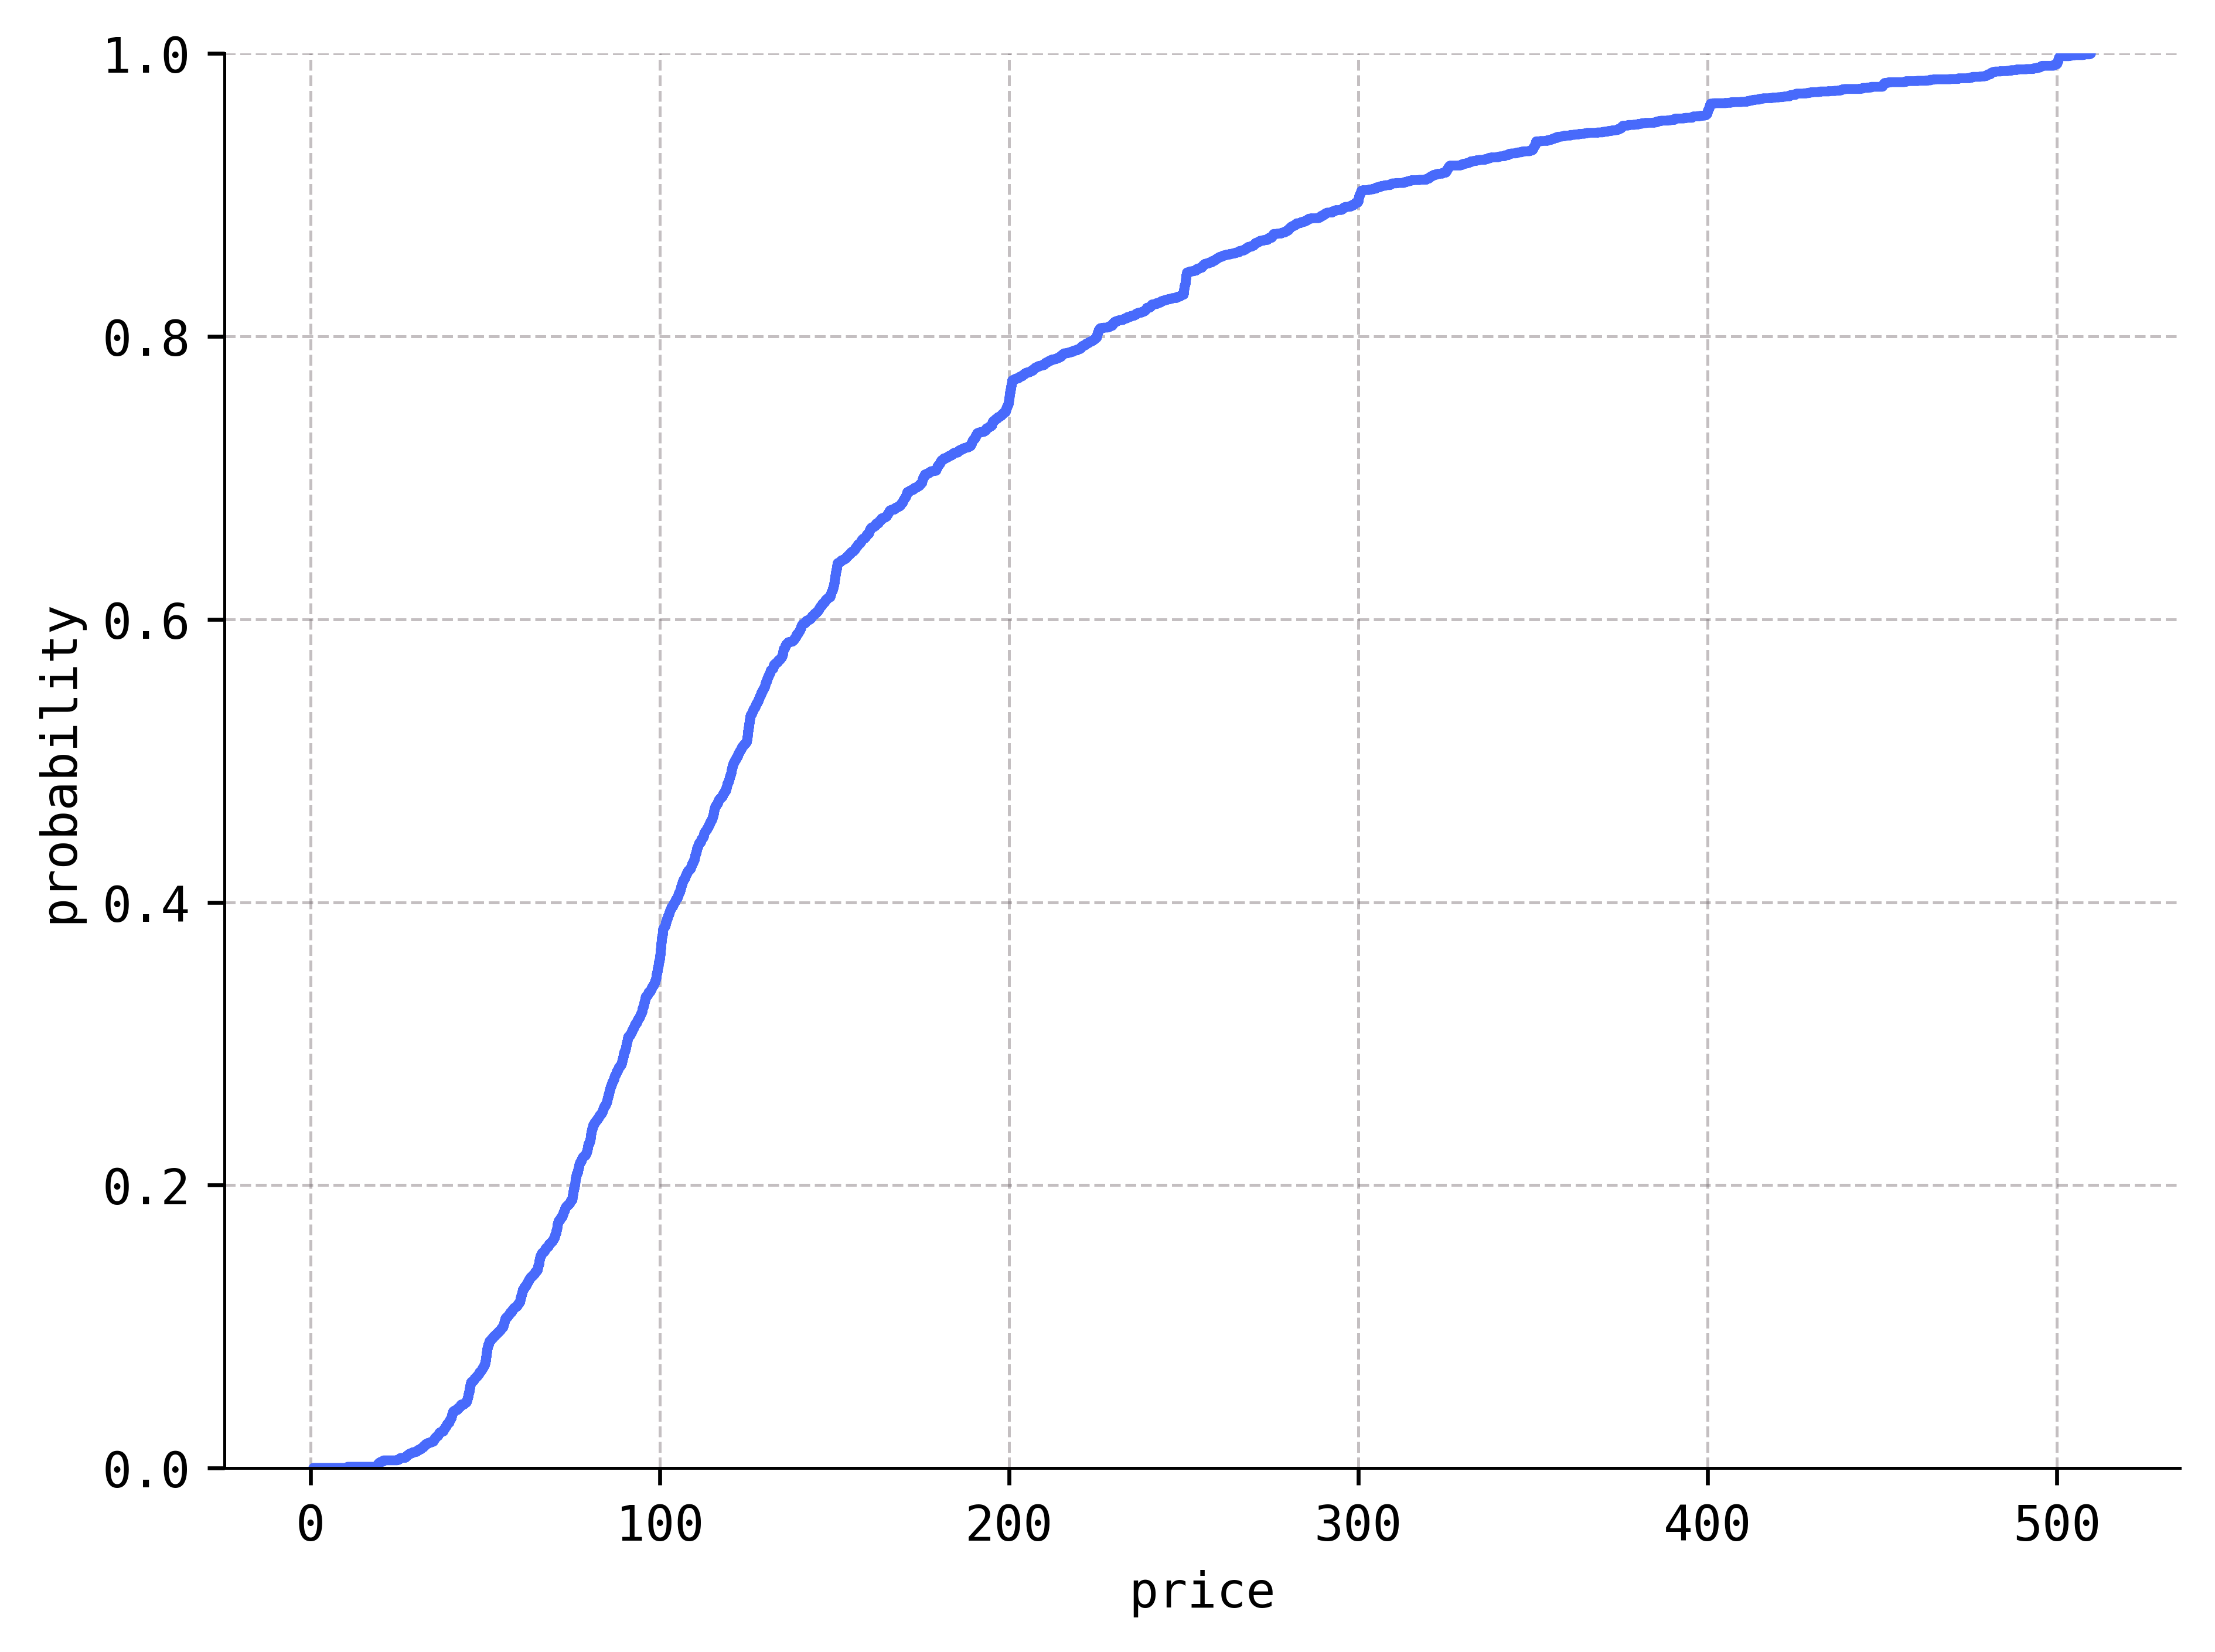

In [2]:
sns.ecdfplot(x=srs_airbnb)
plt.xlabel('price')
plt.ylabel('probability')
plt.tight_layout()

Remember, the CDFs of discrete distributions are step functions. So why doesn't _this_ look like a step function? Essentially, the data points are so numerous and packed together so tightly along the $x$-axis that we can't see the steps. But rest assured, if we were to zoom in, we'd see them.


```{margin}
Of course, the true population of prices is not _actually_ a continuous random variable, since prices only go out to the second decimal place. But we'll still model it as if it is continuous.

```
If we are confident that our observed sample of Airbnb prices is reasonably representative of the unknown population of prices, then its ECDF serves as an approximation to the true population CDF. If we assume that the unknown population distribution is continuous, then there is also an unknown population density function floating around out there in the ether waiting to be discovered. Can we use our ECDF to guess what its shape might be?

_Absolutely_!

The trick is to remember that density functions are the derivatives of CDFs. So, when we look at our ECDF above, we can try to get a feeling for the shape of the density function by estimating the slopes of the tangent lines to the graph of the ECDF. I realize that the ECDF is technically a step function, and hence all of its tangent lines (which exist) are horizontal; but from our perspective, it _looks_ like a nice smooth-ish curve that has positively sloped tangent lines.

To aid our sketch of the unknown density function, it might help to superimpose the CDF of a normal distribution on top of our ECDF:

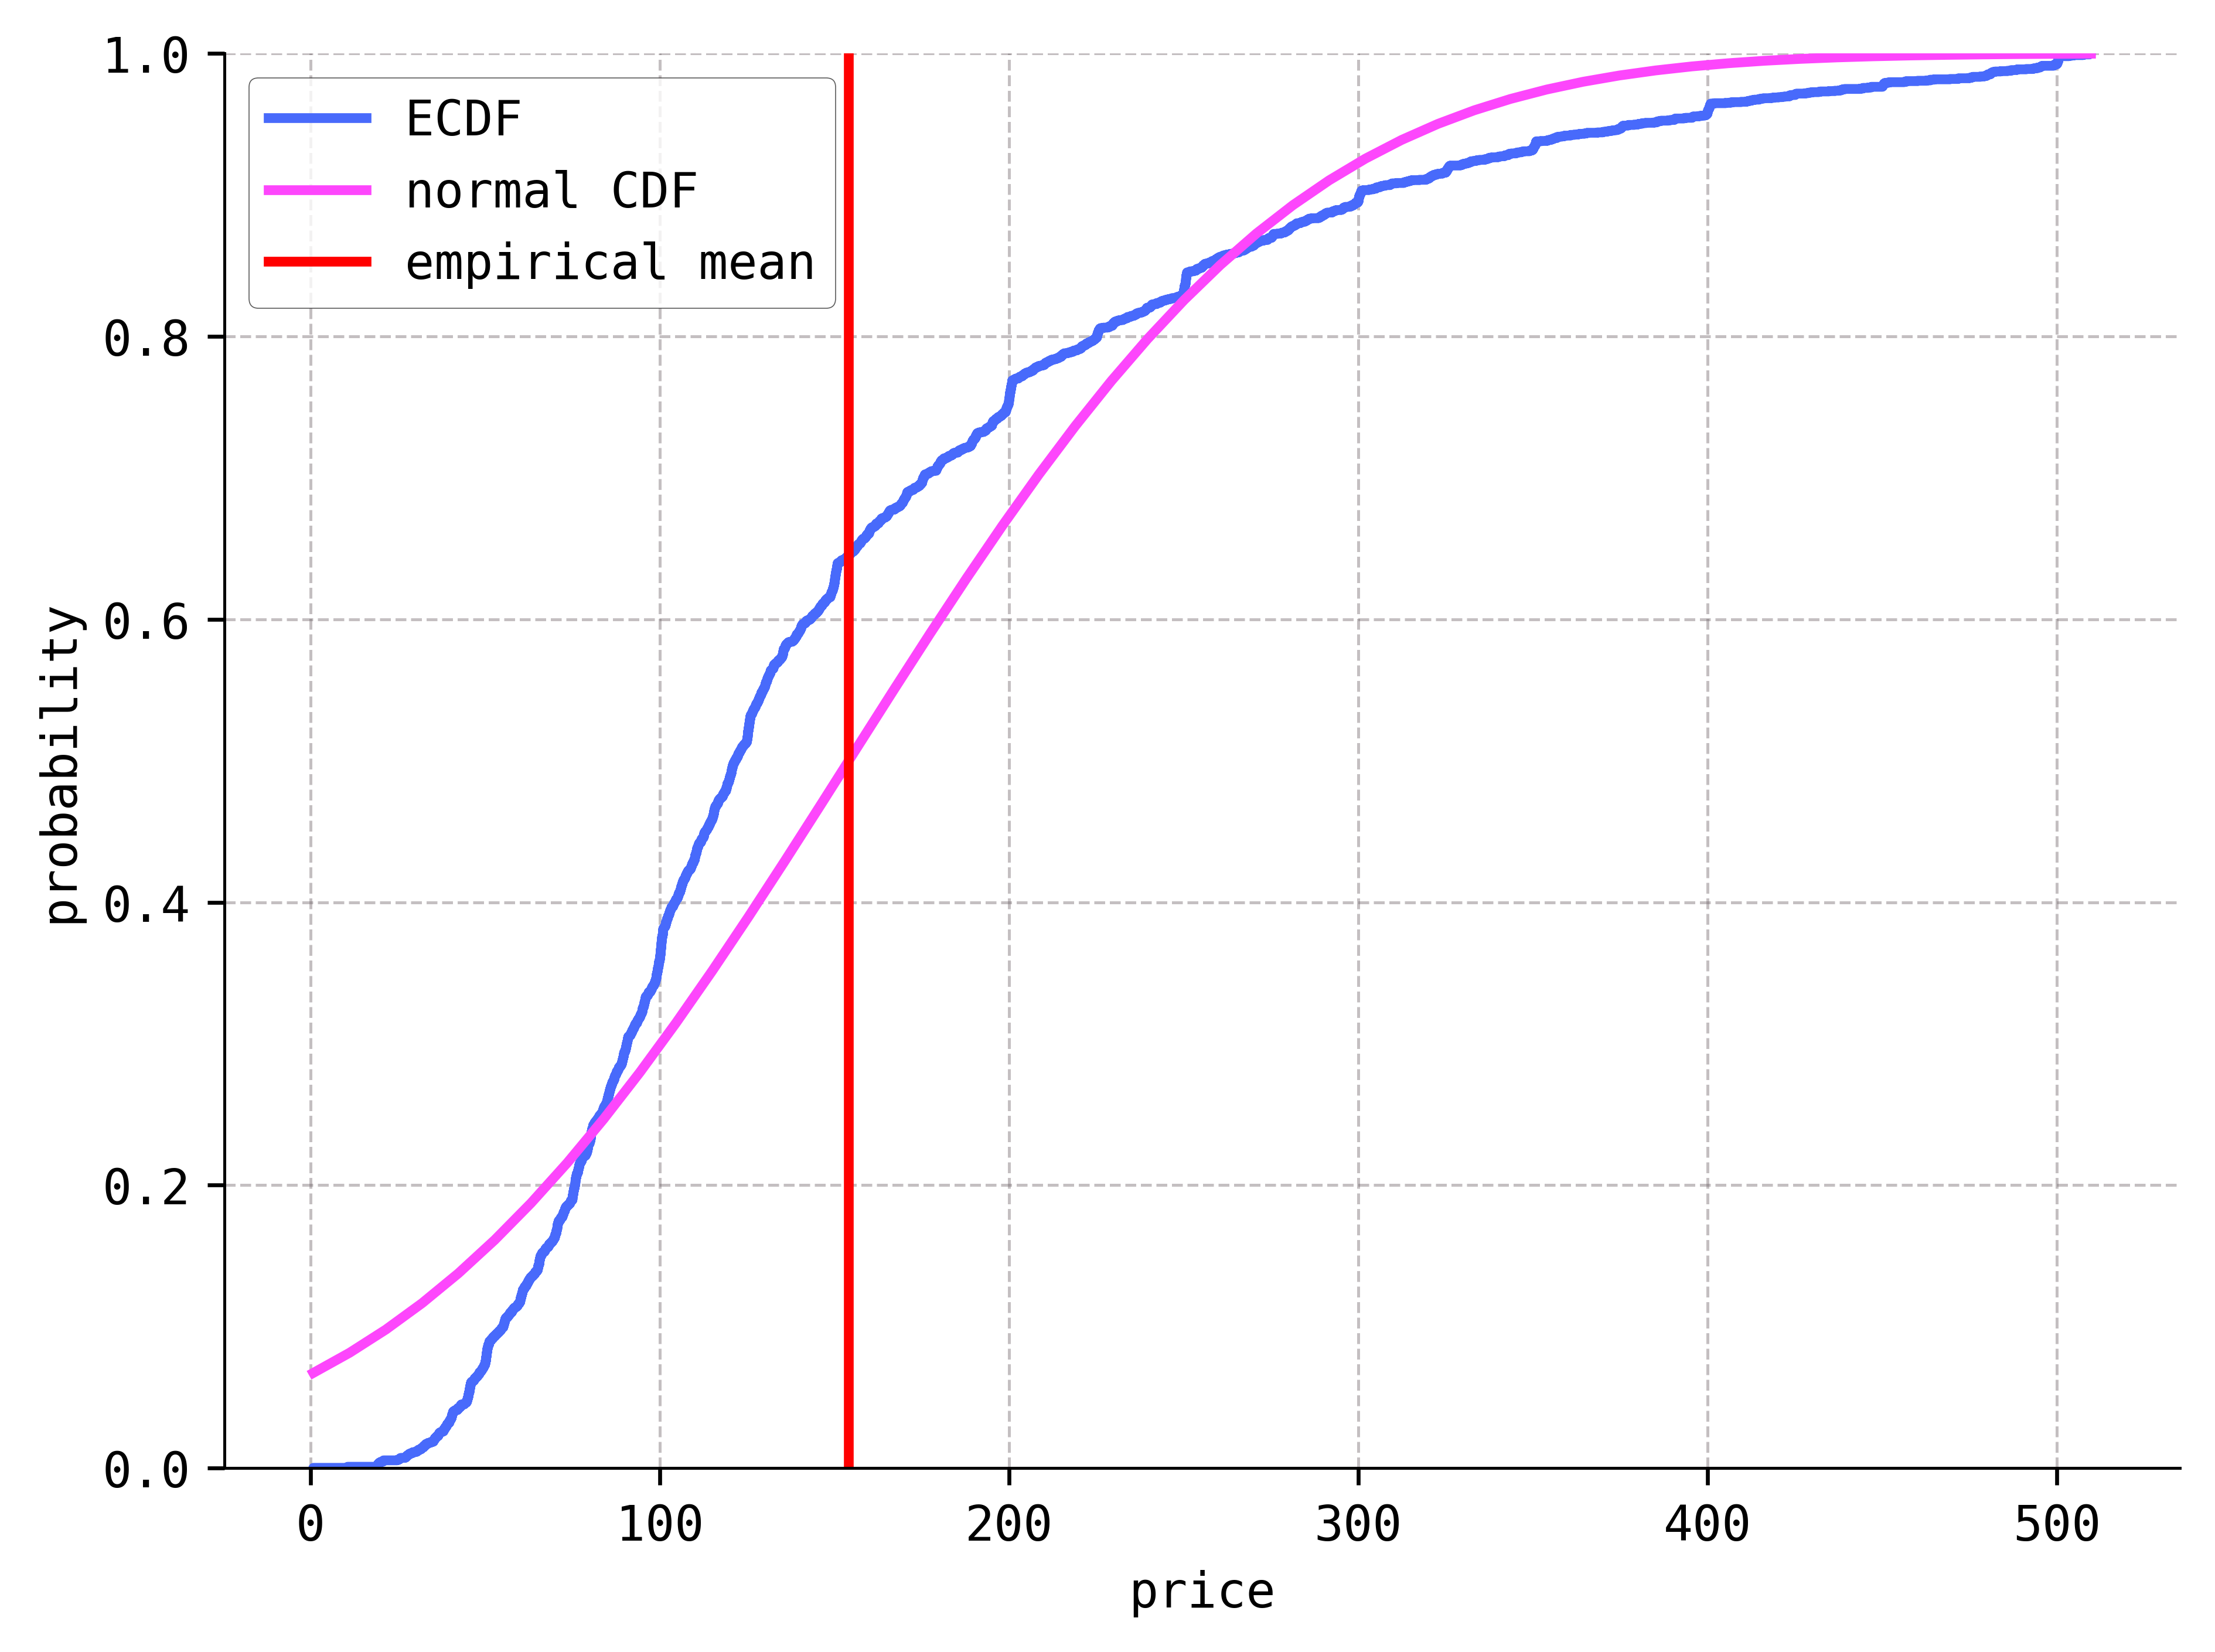

In [3]:
xbar = srs_airbnb.mean()
s = srs_airbnb.std()
X = sp.stats.norm(loc=xbar, scale=s)
grid = np.linspace(srs_airbnb.min(), srs_airbnb.max())

sns.ecdfplot(x=srs_airbnb, label='ECDF')
plt.plot(grid, X.cdf(grid), label='normal CDF')
plt.axvline(x=xbar, color='r', label='empirical mean')
plt.xlabel('price')
plt.ylabel('probability')
plt.legend()
plt.tight_layout()

In this figure, I've plotted the CDF from a $\mathcal{N}(\mu,\sigma^2)$ distribution, where I've used the empirical mean $\bar{x}$ and standard deviation $s$ for the parameters $\mu$ and $\sigma$ (more on these below).

```{margin}
This is essentially just a curve sketching exercise from calculus. We're using our knowledge of the relationships between a function and its first two derivatives, and what these gadgets tell us about increase/decrease and concavity.
```

This is a little of what I can glean from this last figure: If we believed that the true population distribution was normal, the data tells us otherwise. Indeed, the two CDFs have some fairly significant differences. Notice that the ECDF is steeper than the normal CDF right _before_ the red dashed line, and that it also has an inflection point before this line. This tells me that the sample density curve should be peaked slightly to the left of the normal density curve. As we pass over the dashed line, the ECDF is concave downward and hence the sample density curve is decreasing over these $x$-values as it drops downward into its tail. But as it begins its descent, the normal CDF is steeper, so the sample density curve should be descending at a quicker rate, putting it underneath the normal density curve. But then, as we get toward the right edge of the figure, the slopes of the ECDF appear to be larger than those of the normal CDF, and so the two density curves should cross again, putting the sample density's upper tail on top of the normal density's tail. In fact, if I squint hard enough, it appears that the ECDF might have a second inflection point on the far right of the figure.

As I will show you below, computers are capable of estimating PDFs from data using something called _kernel density estimation_ (KDE). If I feed the Airbnb data into my computer, it returns the following sketch of the data density curve using KDE:

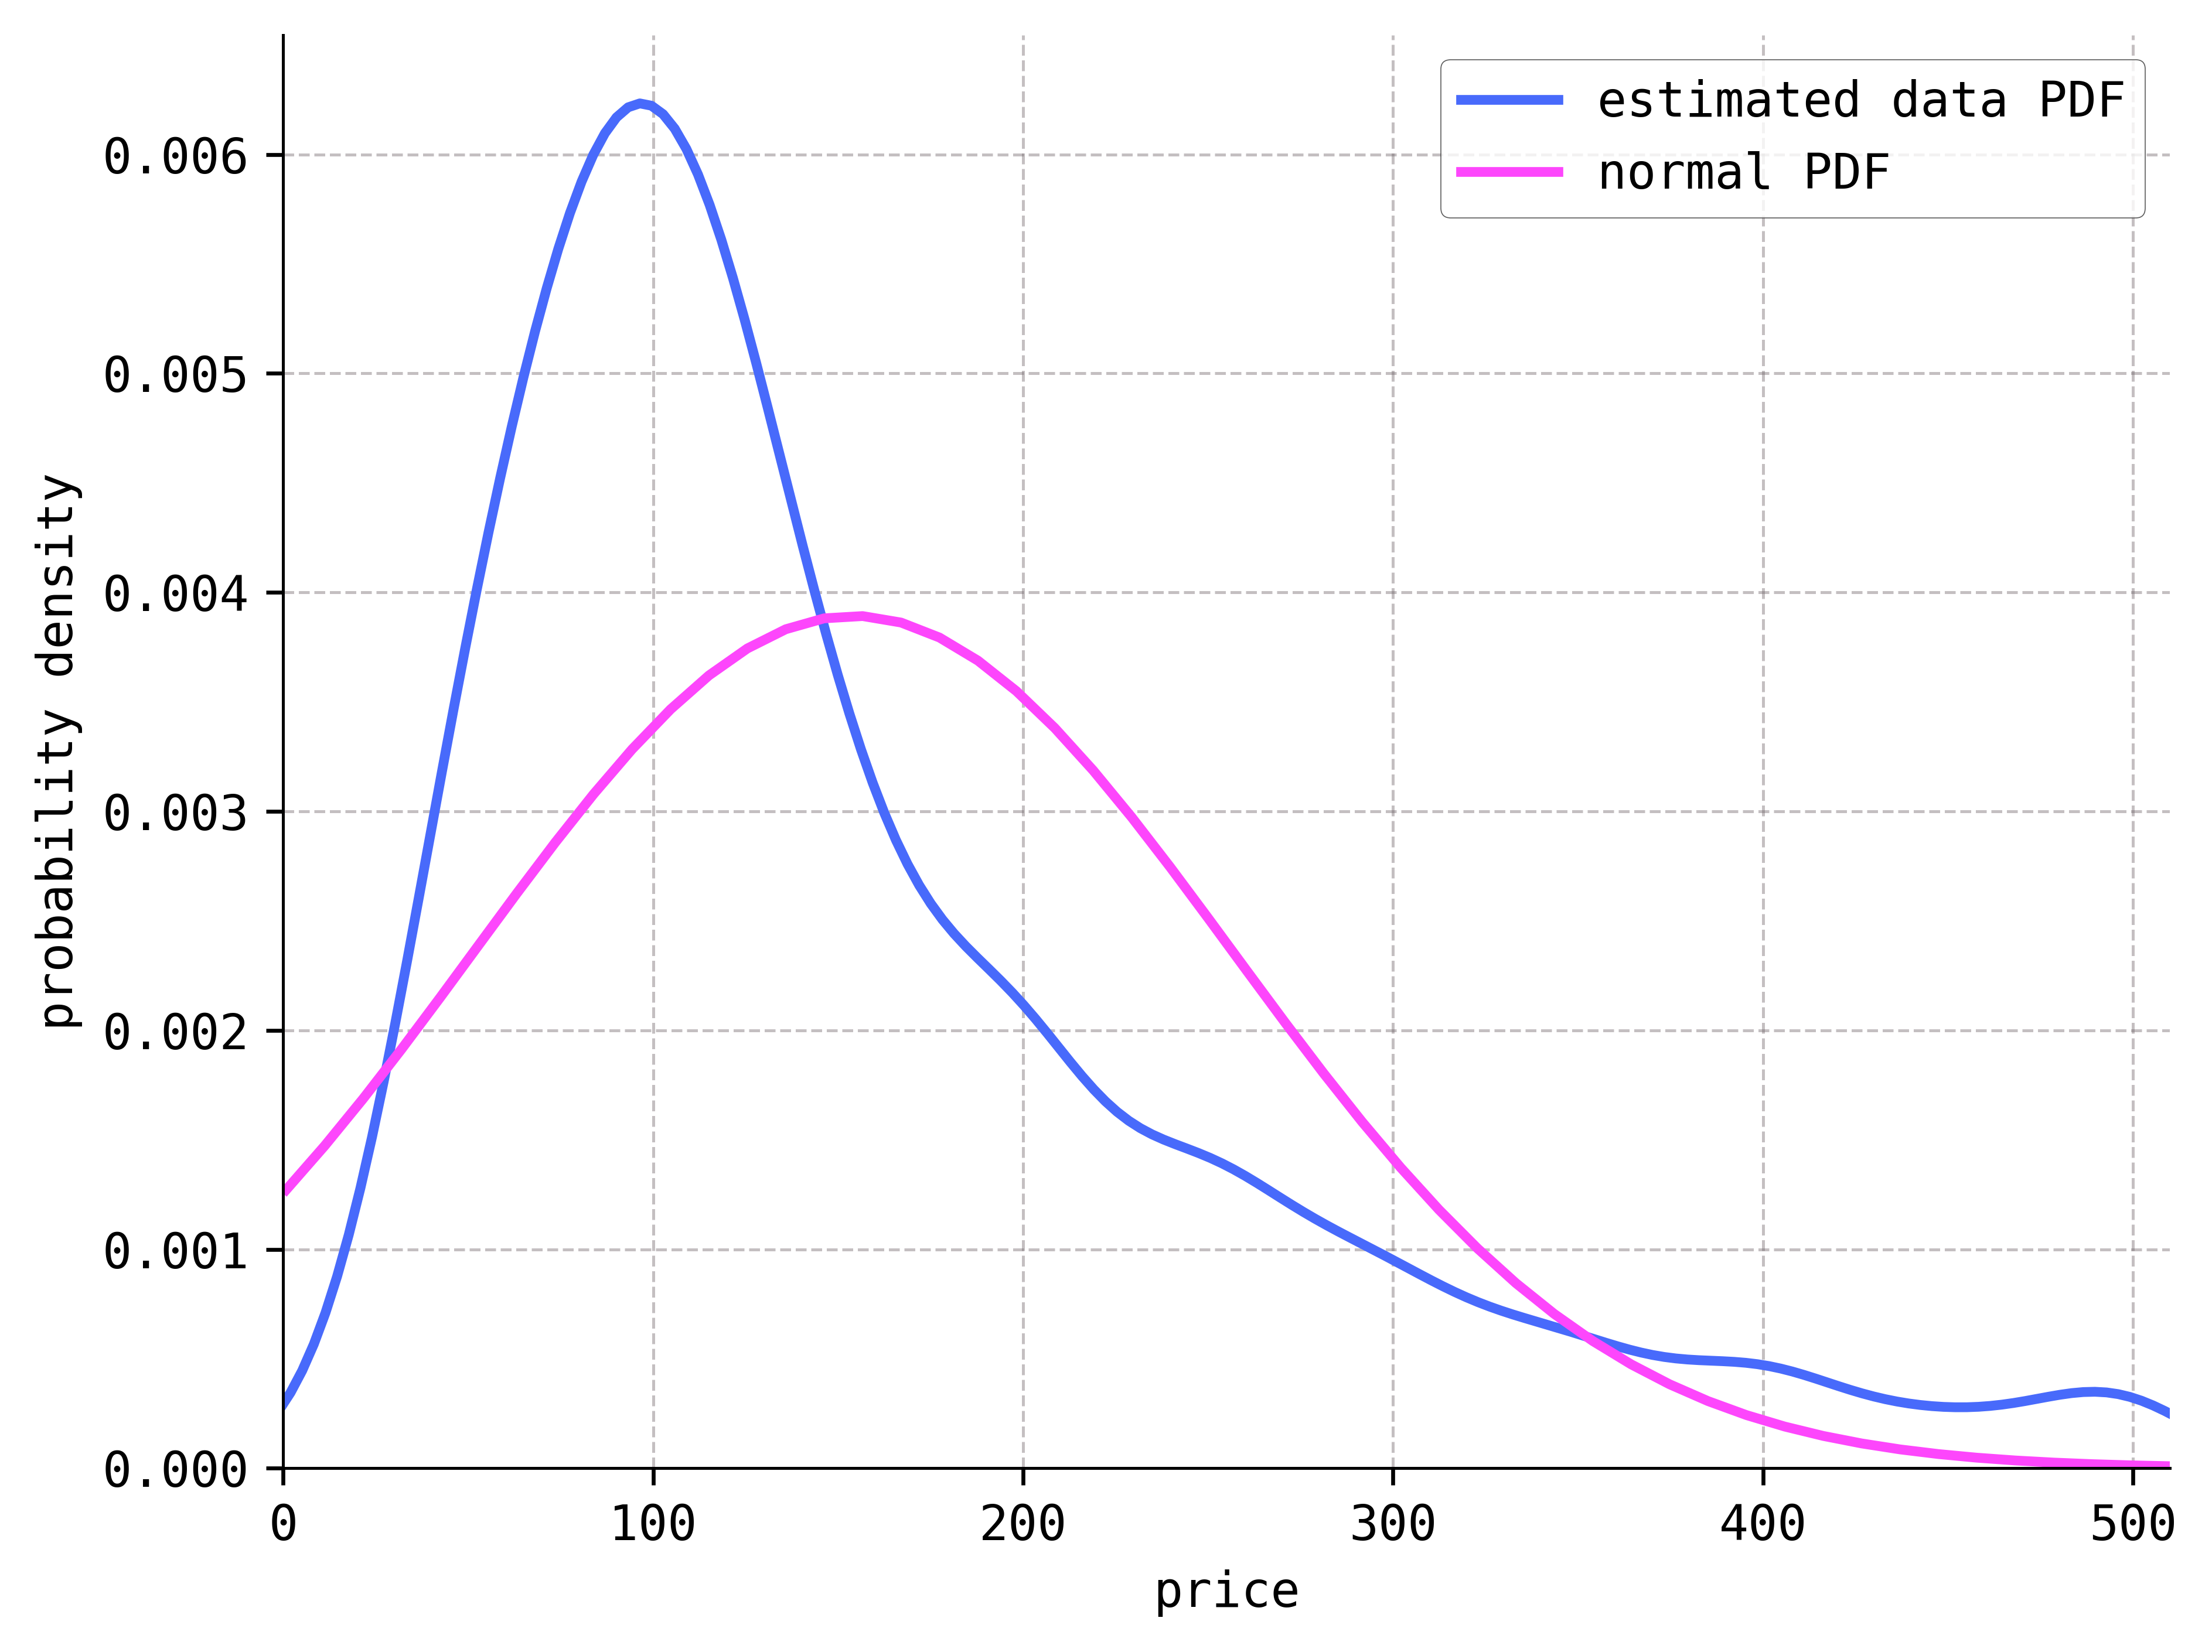

In [4]:
sns.kdeplot(x=srs_airbnb, label='estimated data PDF')
plt.plot(grid, X.pdf(grid), label='normal PDF')
plt.xlabel('price')
plt.ylabel('probability density')
plt.xlim(0, 510)
plt.legend()
plt.tight_layout()

Notice that this plot confirms most of what we thought the data density curve would look like, based on our comparison of the ECDF to the normal CDF. The shape of the estimated data PDF is influenced not only by the actual dataset, but also by a parameter of the KDE process called *bandwidth*. We will explore this in further detail below.



























## Histograms

In the previous section, we used a plot of the ECDF of the Airbnb prices in order to _visualize_ the empirical distribution. From this plot, we were able to get a sense of the _shape_ of the dataset.

There are a few more ways that we might attempt to visualize the empirical distribution. Indeed, since the empirical distribution of the Airbnb prices is technically discrete, we might attempt to visualize it using the probability histograms that we saw in {numref}`prob-histo` and implemented in the [thrid programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments). However, as we saw in the previous section, the data points in our sample are so numerous and packed so closely together that such a probability histogram would be essentially useless. We would have $3{,}548$ bars in our histogram, one for each unique price in our dataset!

But here's an idea: Suppose we "bin together" nearby prices along the $x$-axis _before_ we draw the histogram. In other words, imagine we chop up the $x$-axis into smaller subintervals called _bins_, and then group together nearby data points in these bins:

```{image} ../img/bins1.svg
:width: 100%
:align: center
```
&nbsp;

In the figure on the right, there are seven bins, labeled $B_1,B_2,\ldots,B_7$. The number of bins can either be chosen explicitly by us, or we can let the computer choose the "optimal" number of bins based on some rule of thumb. Either way, the number $k$ of bins need not be $7$.

Now, to draw the "binned" histogram, we put a rectangle on top of each bin:

```{image} ../img/bins.svg
:width: 70%
:align: center
```
&nbsp;

The heights of the rectangles must satisfy _two_ properties: (1) Their areas must sum to $1$, and (2) their heights must be proportional to the number of data points that fall within the bins. For example, you can see that the taller rectangles in the figure contain _more_ data points in their base bins. If $k$ is the total number of bins and $m$ is the size of the data set, then to satisfy both these properties, we can choose the $j$-th rectangle (for $j=1,2,\ldots,k$) to have height

\begin{equation*}
\frac{\text{number of data points in $j$-th bin}}{m \times (\text{width of $j$-th bin})}.
\end{equation*}

Of course, computers are capable of plotting these types of histograms. Here is one for our Airbnb prices:

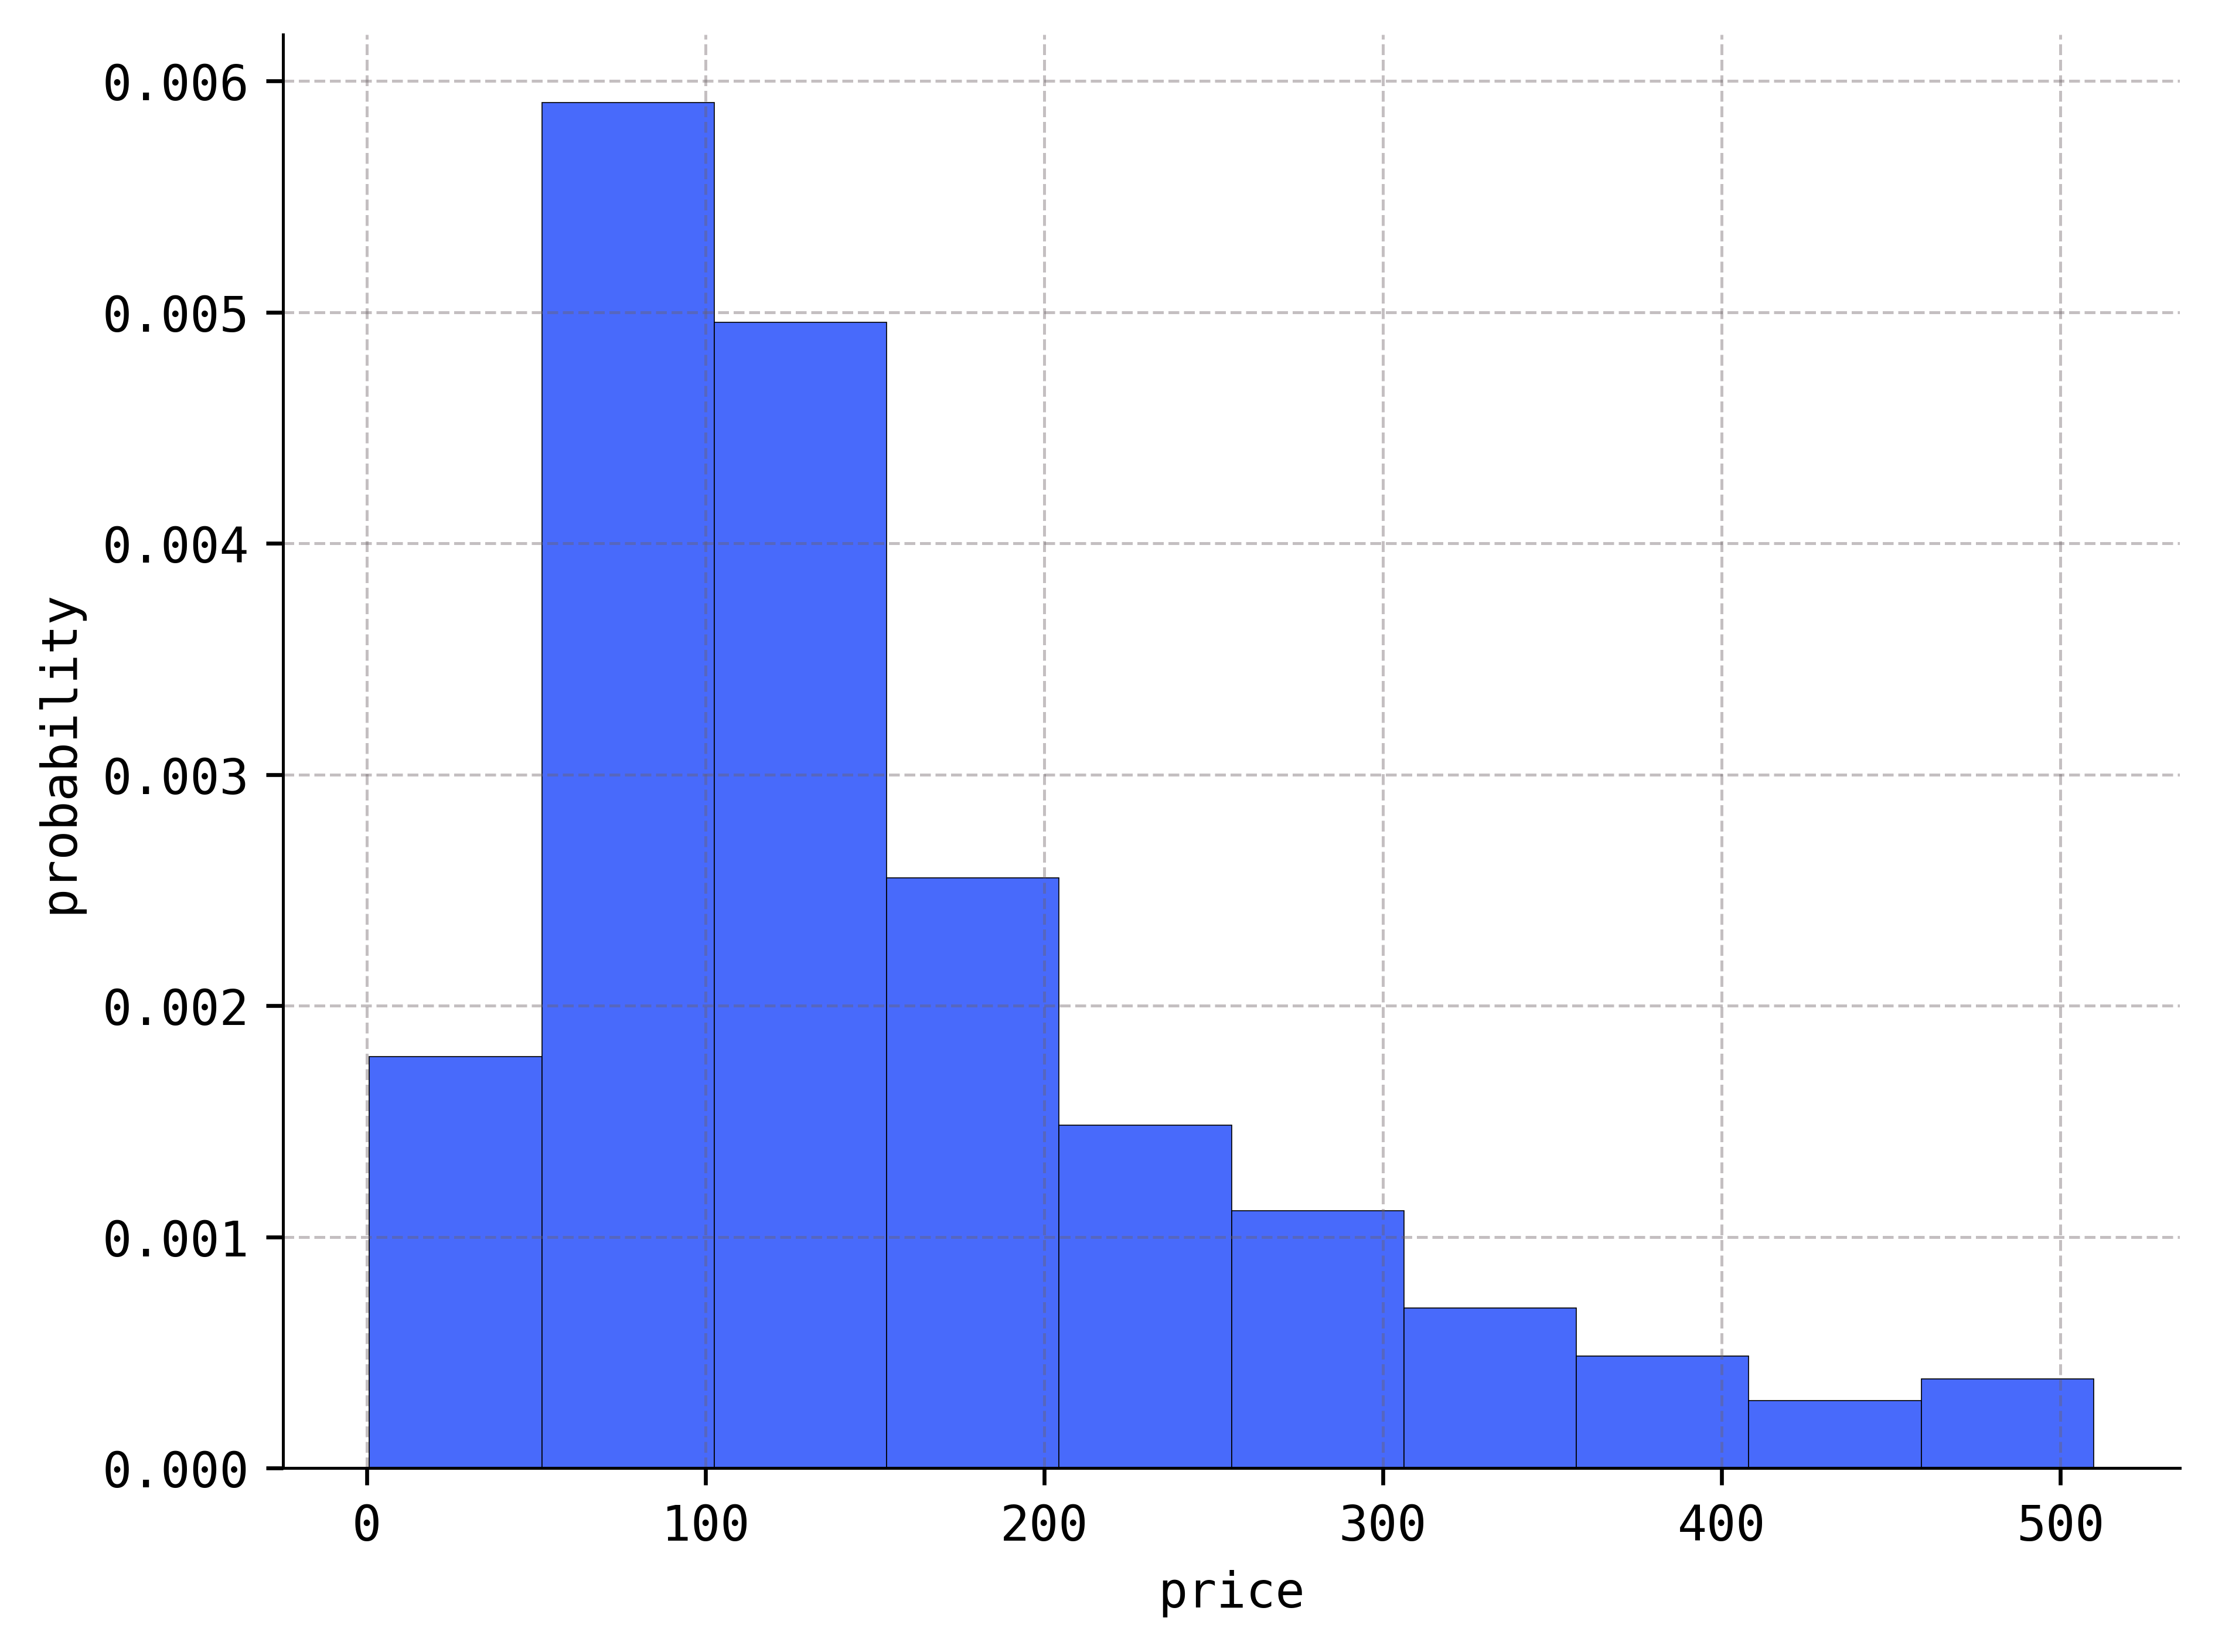

In [5]:
srs_airbnb.plot(kind='hist', ec='black', density=True)
plt.xlabel('price')
plt.ylabel('probability')
plt.tight_layout()

Taking a moment to look at this histogram, if you then scroll up and look at the estimated data density curve in the previous section, you'll notice that they match up pretty well. Thus, both ways of getting a sense of the shape of the data (estimated density curves and histograms) do their jobs adequately.

Be warned, however, that the shapes of these types of histograms are quite sensitive to the number of bins (hence also the bin width), and making the _wrong_ choice for this number can sometimes hide important features of the data. Here's a histogram of the Airbnb data with 100 bins:

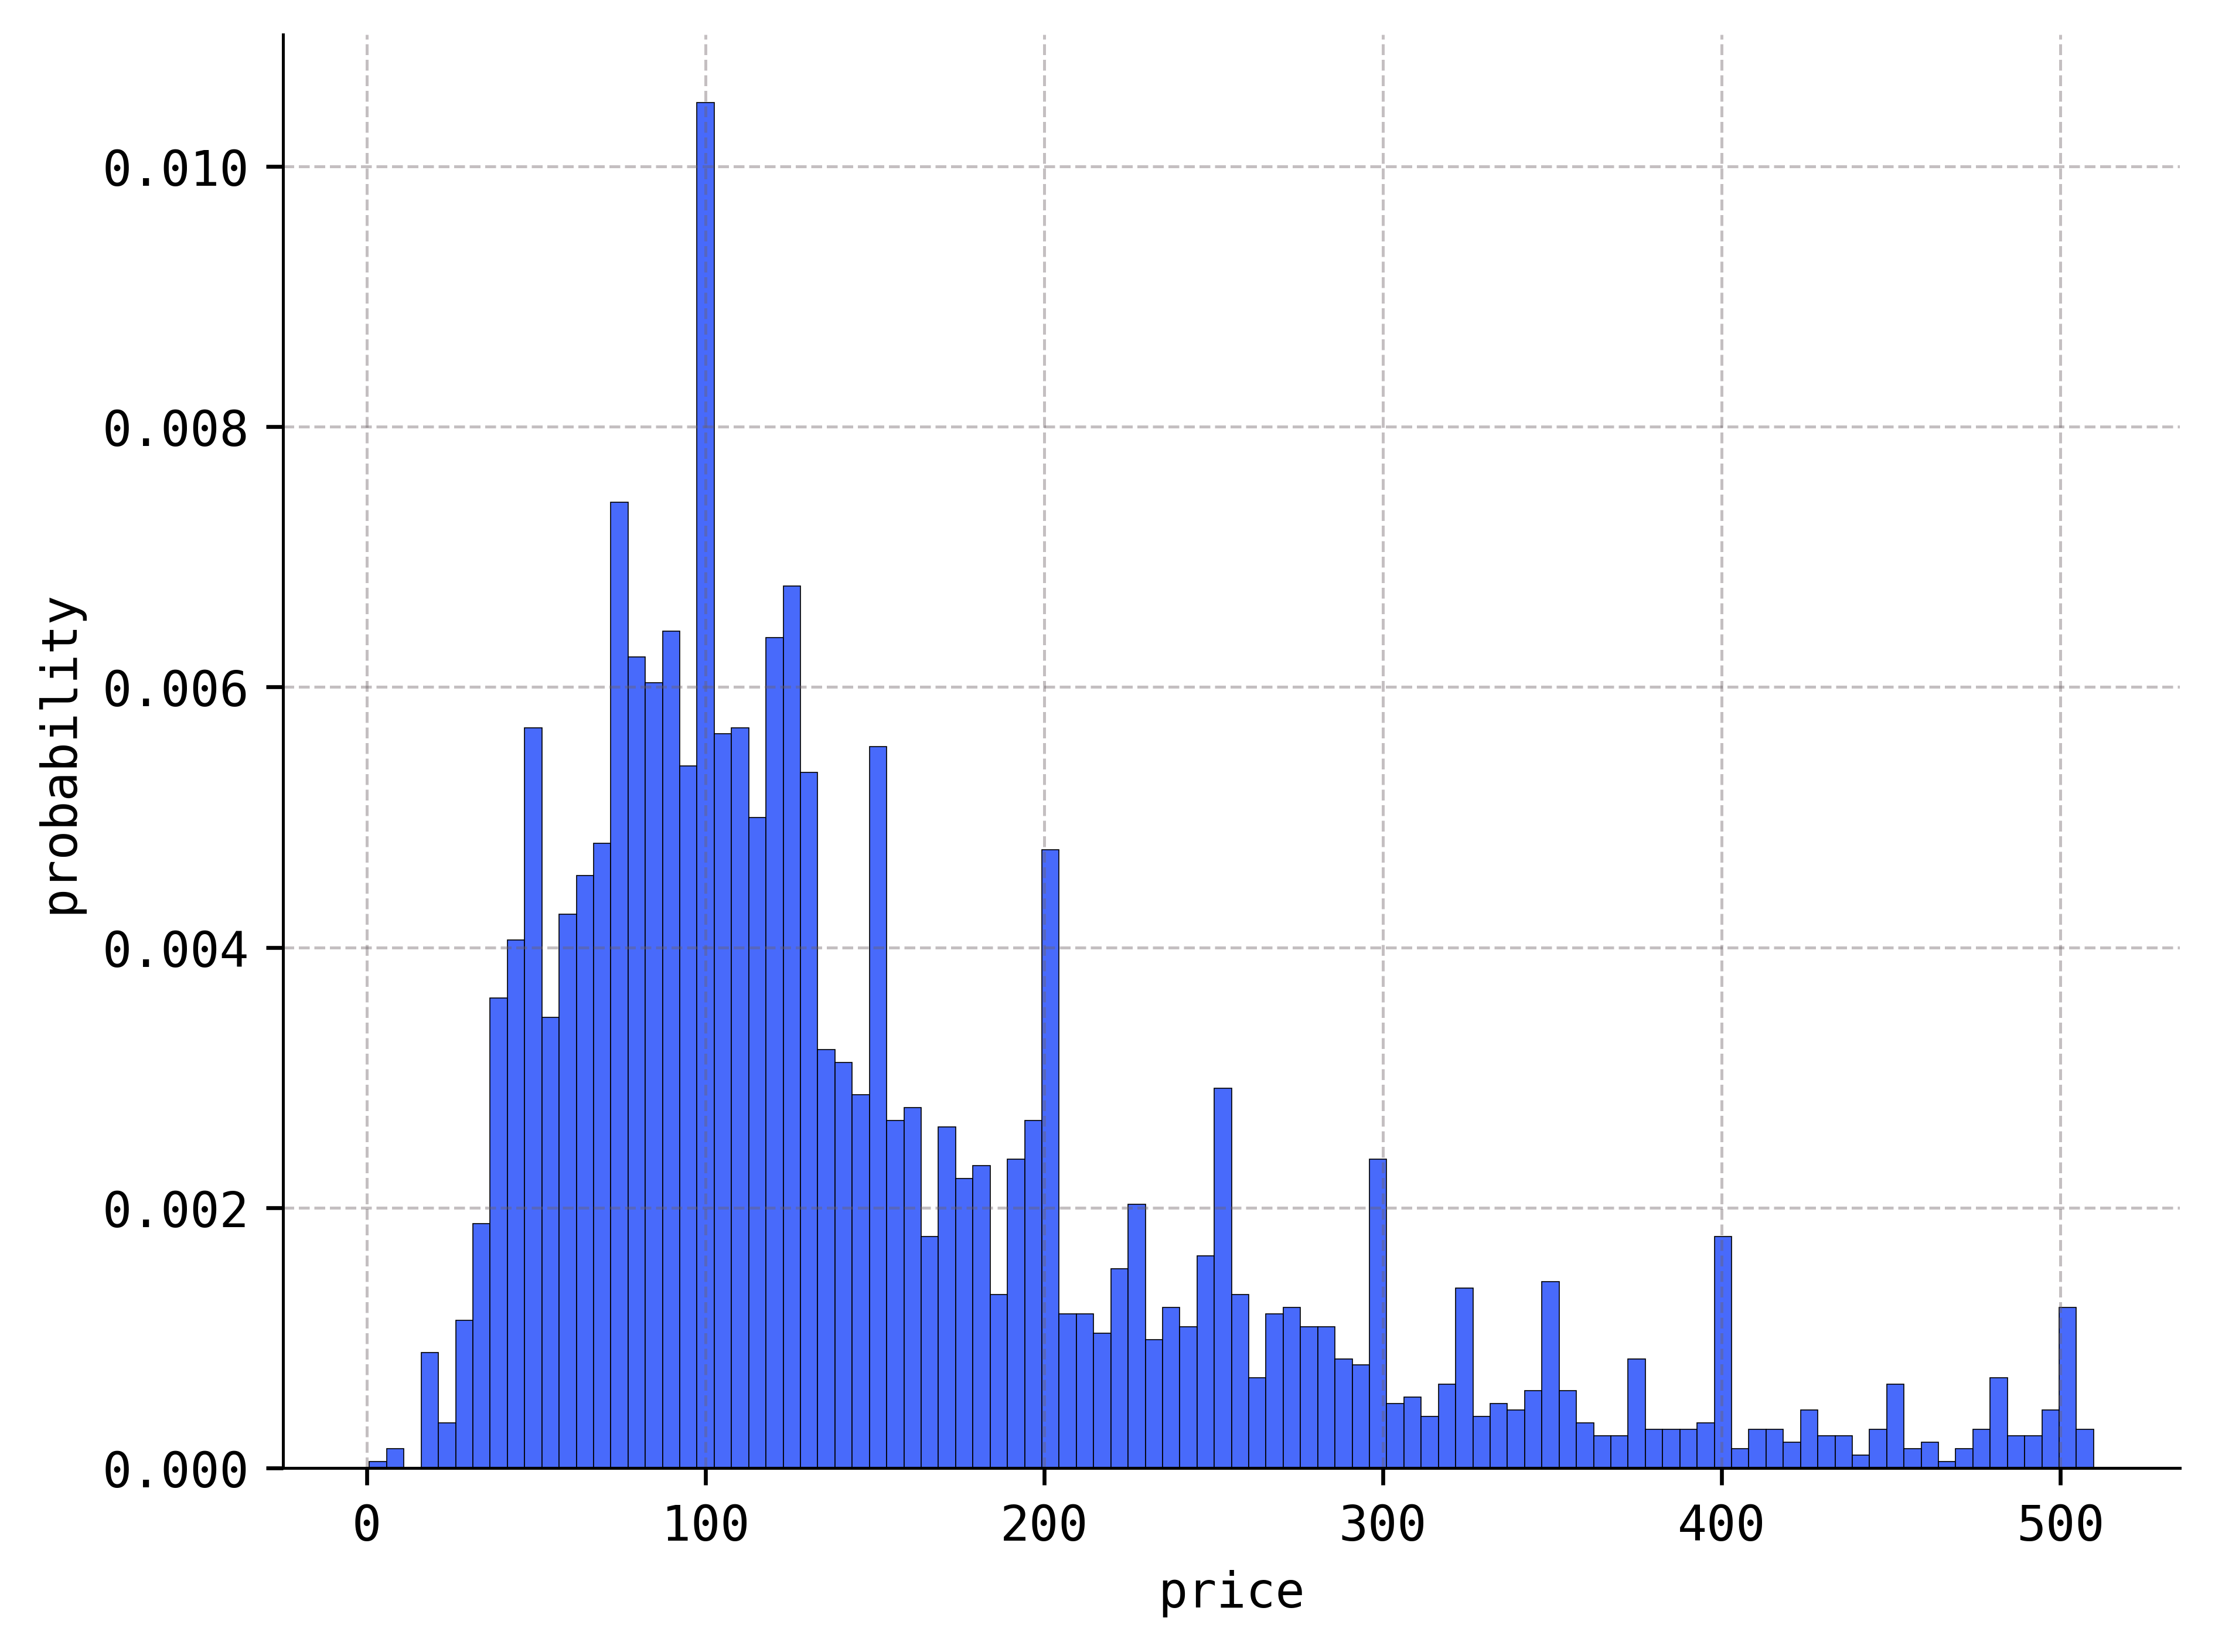

In [6]:
srs_airbnb.plot(kind='hist', ec='black', density=True, bins=100)
plt.xlabel('price')
plt.ylabel('probability')
plt.tight_layout()

Though there are lots more bins here than our first histogram, I can still get a pretty good sense of the shape of the data. When you increase the number of bins, you tend to lose "smoothness" of the histogram.

At the other extreme, here's a histogram with three bins:

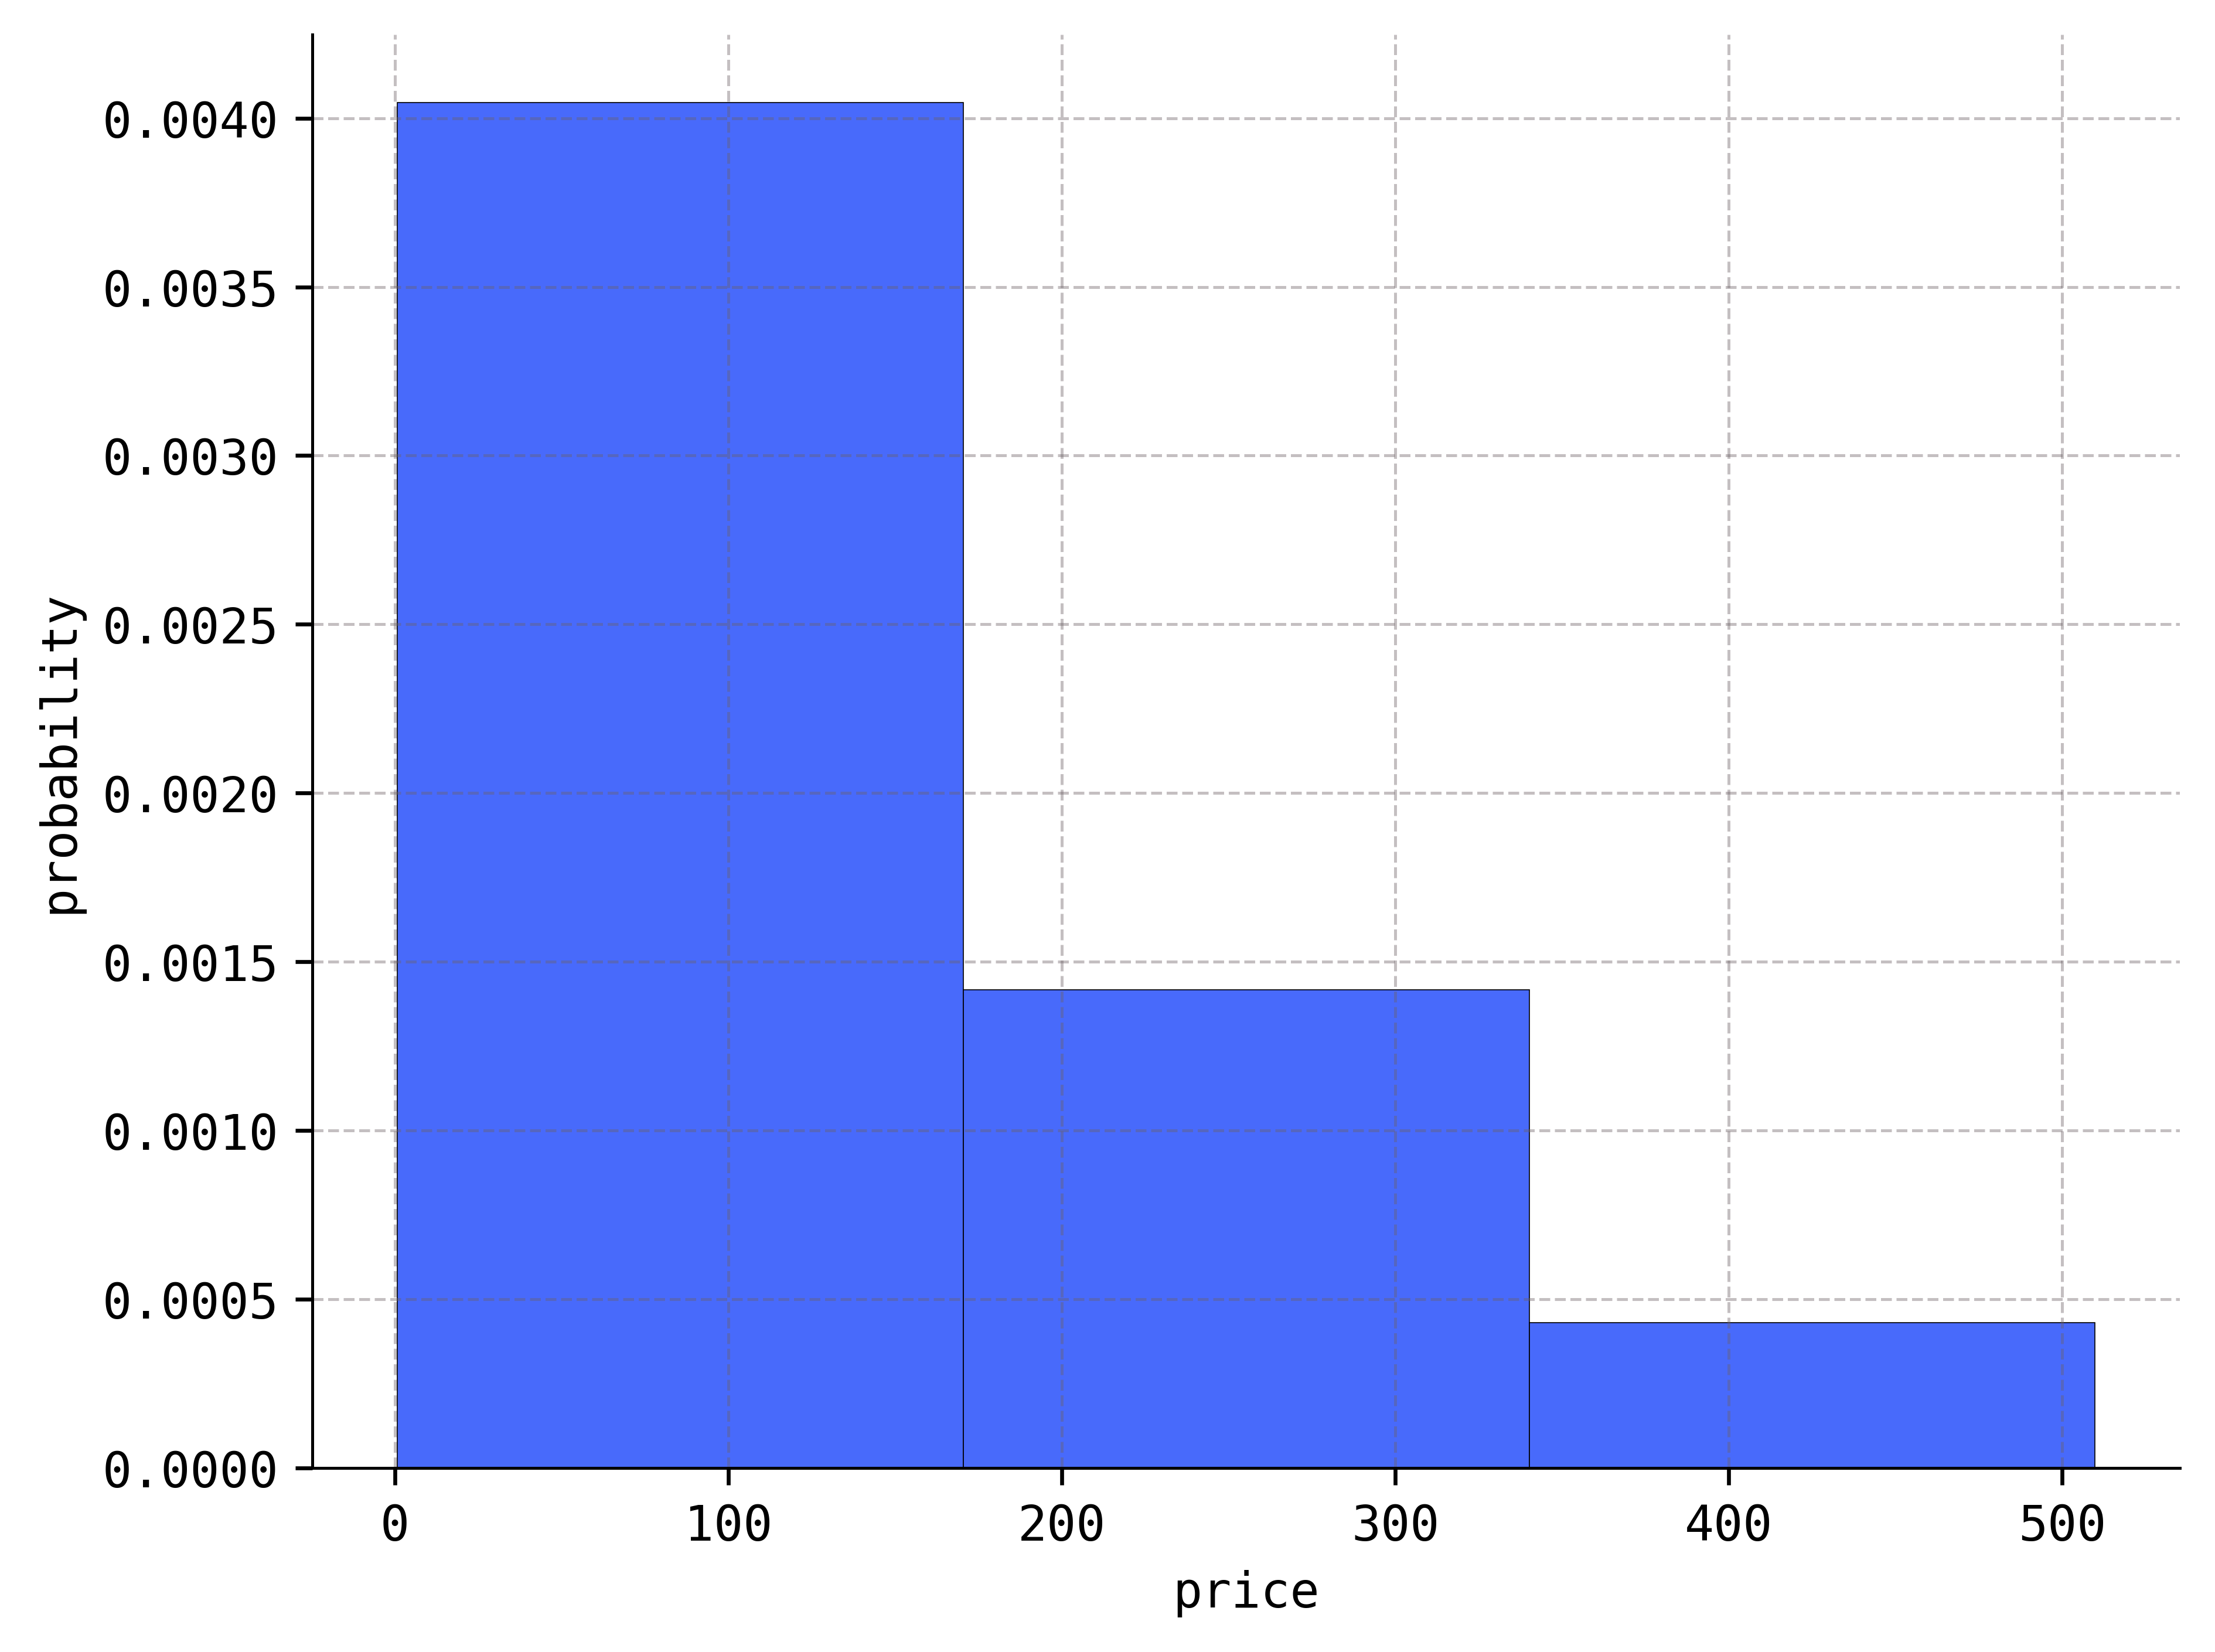

In [7]:
srs_airbnb.plot(kind='hist', ec='black', density=True, bins=3)
plt.xlabel('price')
plt.ylabel('probability')
plt.tight_layout()

This last histogram is not particularly informative. I get a sense that the sample data is skewed toward the right, but that's about it.

So, how do you choose the number of bins? First, you might let the computer decide for you, using the default setting. This default setting is often based off of rules of thumb that have been demonstrated to work well for some reason or another. Then, you can play with the number of bins manually, fine-tuning the number until you get a figure that you believe most accurately represents the shape of the data.























## Kernel density estimation

Let's return now to an idea that we met above: Estimating a empirical distribution's _density_ curve. I mentioned that one way to accomplish this task is to use something called a _kernel density estimator_ (KDE). I will now give a very brief introduction to these estimators.

Naturally, a kernel density estimation begins by choosing the _kernel_, which is a function that has a "bell shape," not unlike the normal density curve. In fact, one can even _choose_ the normal density curve as the kernel, and then one obtains _Gaussian KDE_. These will be the only types of kernels that we will consider.

Imagine for simplicity that we have three data points along the $x$-axis. The idea is then to place three kernels (i.e., normal density curves) directly over top of the data points. We then _sum_ the kernels and divide by $3$ (to normalize the area under the curve to $1$), obtaining a _kernel density estimate_. The width of the kernel is controlled by a parameter called _bandwidth_, denoted $h$, which coincides with the standard deviation of the normal distribution in the case of Gaussian KDE. So, large values of $h$ correspond to wide kernels, and smaller values correspond to narrower kernels. Here are three examples of Gaussian KDE with different values of $h$:

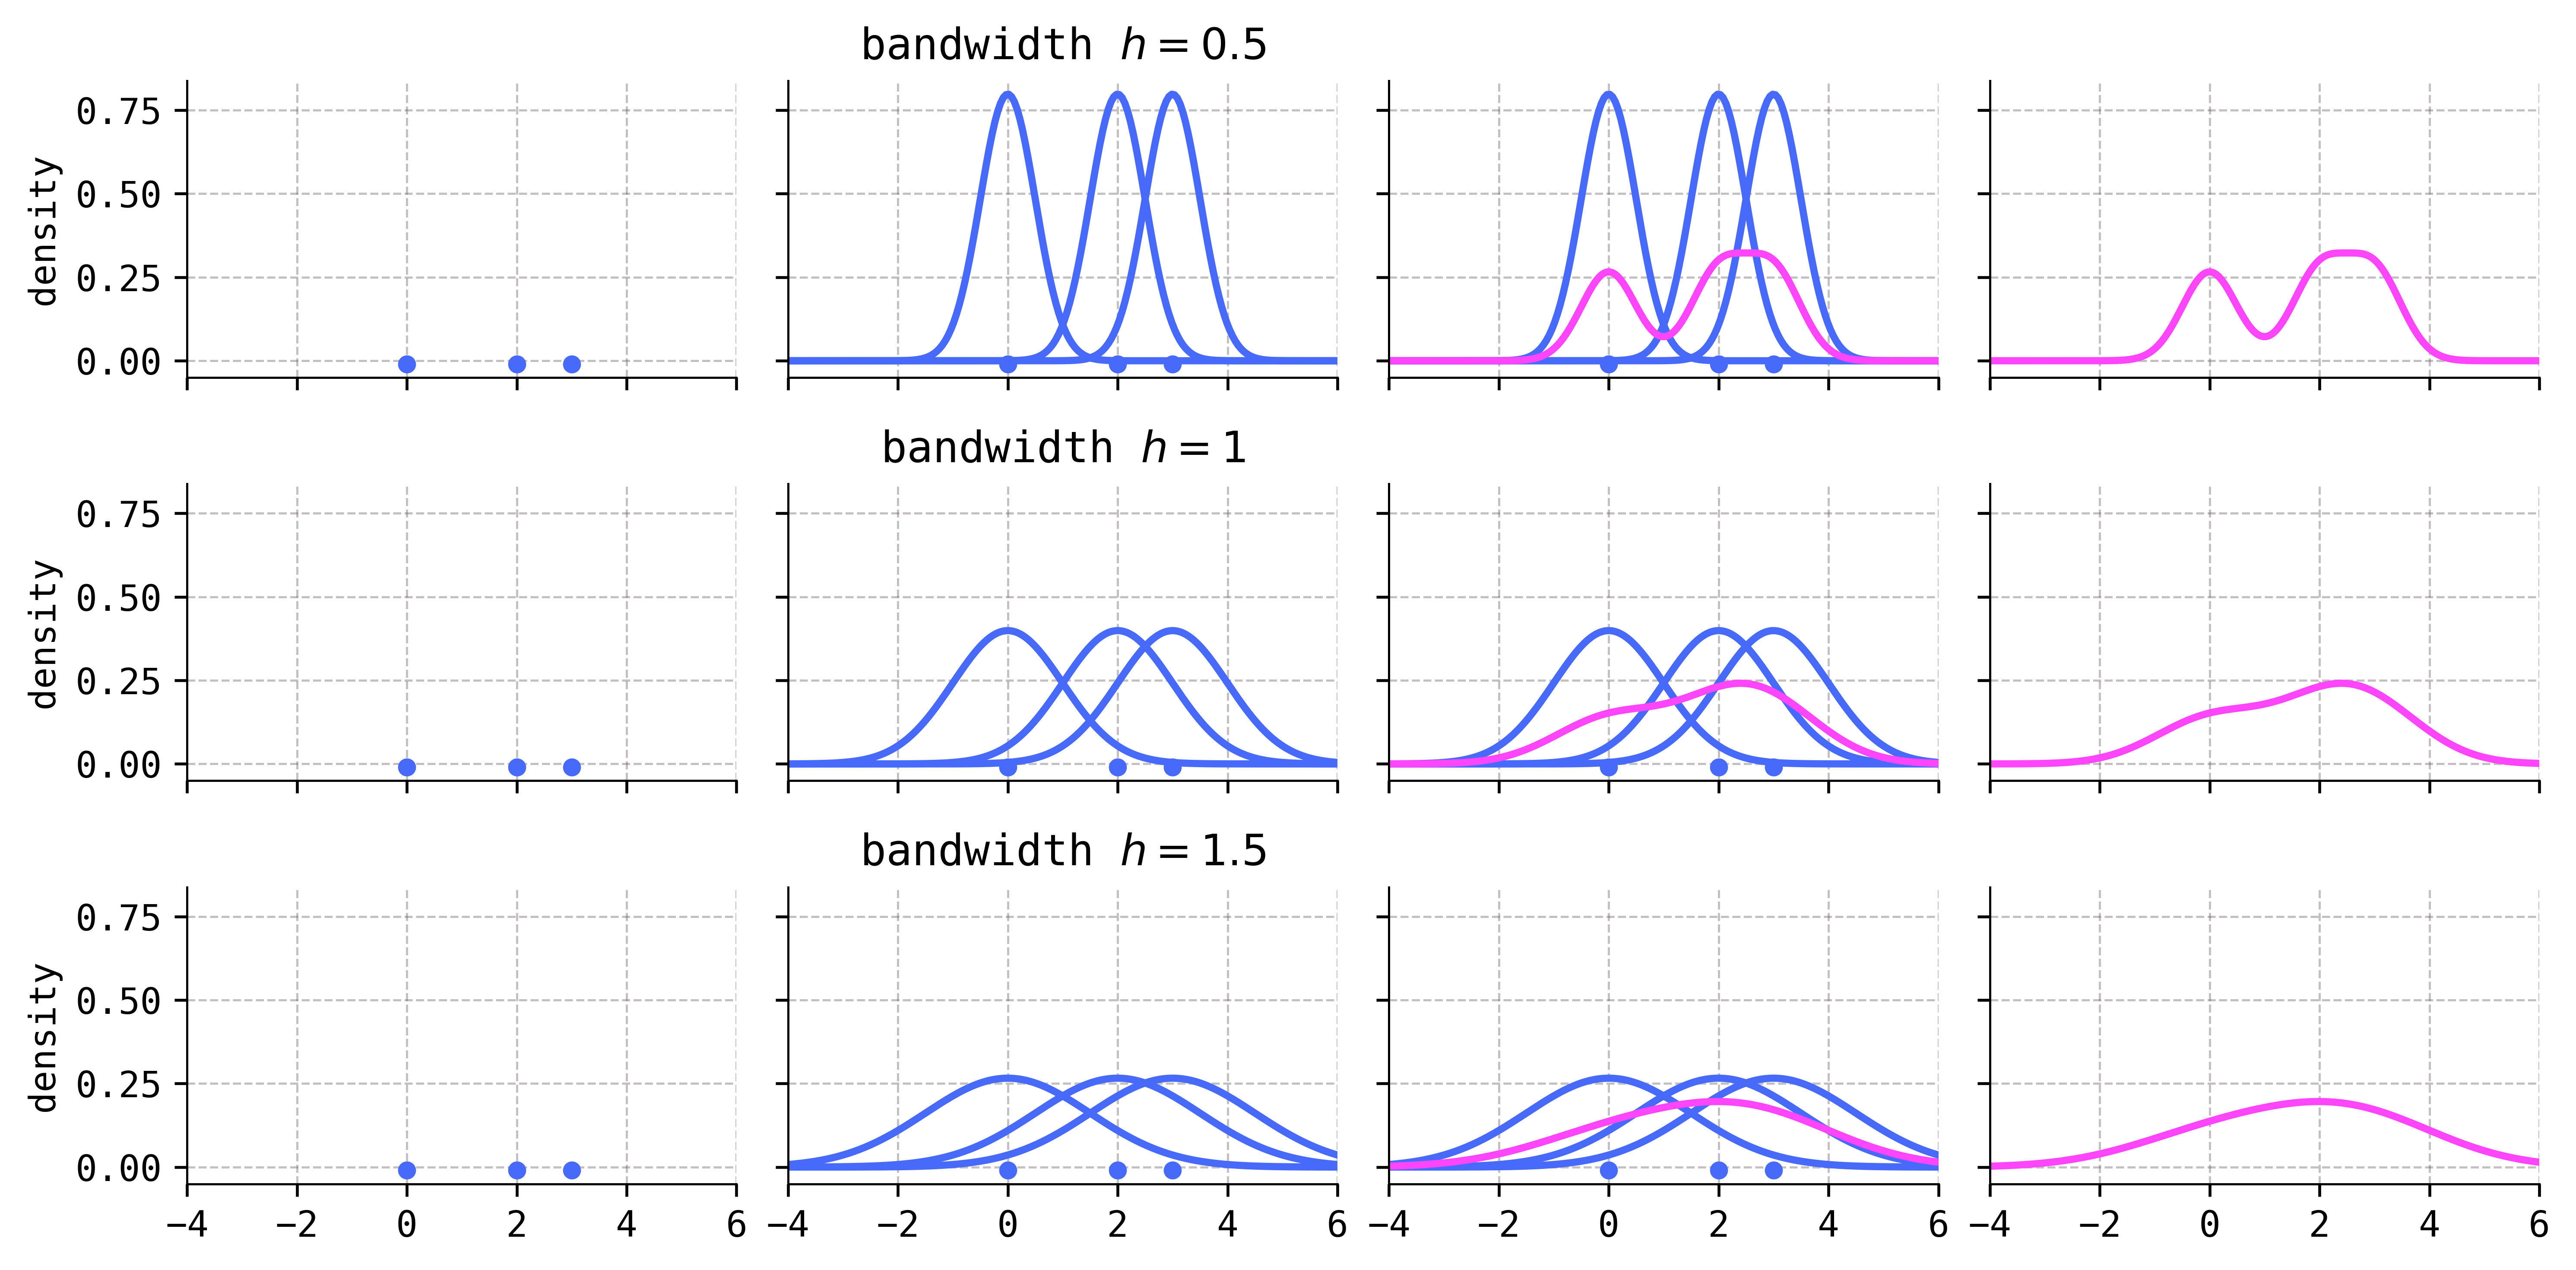

In [8]:
x = np.linspace(-4, 6, 200)
fig, axes = plt.subplots(nrows=3, ncols=4, sharey=True, sharex=True, figsize=(10, 5))
bandwidths = [0.5, 1, 1.5]

for h in bandwidths:
    idx = bandwidths.index(h)
    blue = '#486AFB'
    magenta = '#FD46FC'

    y1 = sp.stats.norm.pdf(x / h) / h
    y2 = sp.stats.norm.pdf((x - 2) / h) / h
    y3 = sp.stats.norm.pdf((x - 3) / h) / h

    axes[idx, 0].plot(0, -0.01, 'o', color=blue)
    axes[idx, 0].plot(2, -0.01, 'o', color=blue)
    axes[idx, 0].plot(3, -0.01, 'o', color=blue)
    axes[idx, 0].set_xlim(-4, 6)
    axes[idx, 0].set_ylabel('density')

    axes[idx, 1].plot(x, y1, )
    axes[idx, 1].plot(x, y2, color=blue)
    axes[idx, 1].plot(x, y3, color=blue)
    axes[idx, 1].plot(0, -0.01, 'o', color=blue)
    axes[idx, 1].plot(2, -0.01, 'o', color=blue)
    axes[idx, 1].plot(3, -0.01, 'o', color=blue)
    axes[idx, 1].set_title(rf'bandwidth $h={h}$')

    axes[idx, 2].plot(x, y1, )
    axes[idx, 2].plot(x, y2, color=blue)
    axes[idx, 2].plot(x, y3, color=blue)
    axes[idx, 2].plot(0, -0.01, 'o', color=blue)
    axes[idx, 2].plot(2, -0.01, 'o', color=blue)
    axes[idx, 2].plot(3, -0.01, 'o', color=blue)
    axes[idx, 2].plot(x, (y1 + y2 + y3) / 3, label='sum of kernels')

    axes[idx, 3].plot(x, (y1 + y2 + y3) / 3, label='sum of kernels', color=magenta)

plt.tight_layout()

Reading from left to right, here's what's going on:

* The plots in the first column display the original three data points.

* In the second column, you see the normal density curves over top of the data points for three different values of the bandwidth $h$.

* In the third column, I have plotted the _sum_ of the three normal density curves (divided by $3$), which are, by definition, the KDEs generated from the data set.

* In the last column, I have plotted the KDEs on their own.

Now, cover up the middle two columns in the figure. Which of the KDEs do you believe does the best job of conveying the _shape_ of the data? I would say it's a split decision between $h=1$ and $h=0.5$.

You've seen how to generate a KDE for a small three-sample dataset. The KDE that I generated above for the Airbnb prices follows the exactly same procedure, but instead of three normal density curves, there are now 3,972 of them, one for each data point in the sample! Here are three KDEs for the Airbnb prices, with different bandwidths:

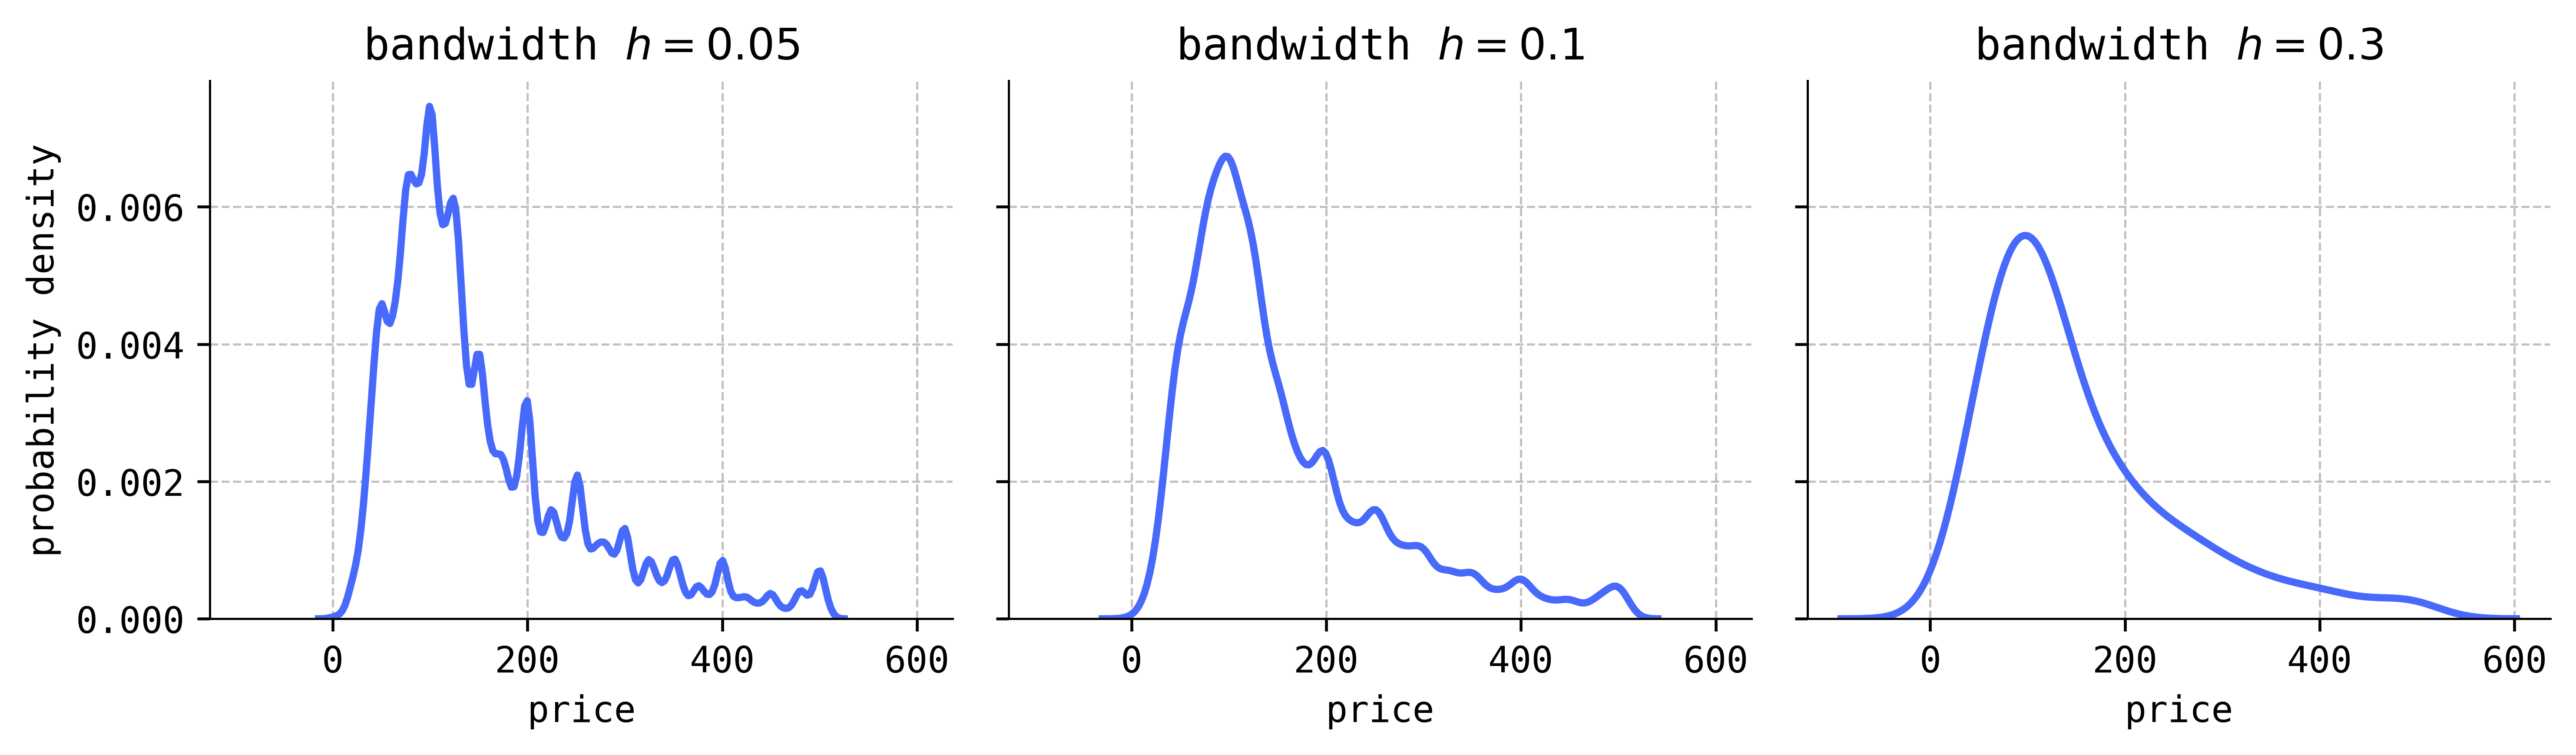

In [9]:
bandwidths = [0.05, 0.1, 0.3]
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=True, figsize=(10, 3))

for h in bandwidths:
    idx = bandwidths.index(h)
    sns.kdeplot(x=srs_airbnb, ax=axes[idx], bw_method=h)
    axes[idx].set_xlabel('price')
    axes[idx].set_title(f'bandwidth $h={h}$')
    
axes[0].set_ylabel('probability density')
plt.tight_layout()

So, we've seen that KDEs are supposed to serve as estimates for the density curves of datasets, but they are highly sensitive to the choice of bandwidth $h$. How do you choose $h$? Just like the 'number of bins' parameter for histograms, you are best off first letting the computer decide the bandwidth for you, and then manually fine-tune it (if needed) until you get a KDE that you believe best represents the data.



















## Empirical statistics

Before we continue discussing more ways to _visualize_ datasets, we need to discuss numerical summaries of datasets. This section is essentially a recapitulation of what you learned in the [third programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments) with a few new things thrown in at the end.

Let's begin our discussion by returning to a general IID random sample

\begin{equation*}
X_1,X_2,\ldots, X_n \sim F,
\end{equation*}

where $F$ represents the (unknown) distribution function corresponding to a probabilistic model. Suppose that the model distribution has a mean $\mu_0$ and a standard deviation $\sigma_0$, so that

\begin{equation*}
E(X_k) = \mu_0 \quad \text{and} \quad V(X_k) = \sigma_0^2,
\end{equation*}

for each $k=1,2,\ldots,n$. Based on an observed random sample

\begin{equation*}
x_1,x_2,\ldots, x_n,
\end{equation*}

how might we estimate the unknown population parameters $\mu_0$ and $\sigma_0$?

```{prf:definition}
Let $x_1,x_2,\ldots,x_n$ be an observed random sample (i.e., a dataset). The *empirical mean* is defined to be the number

\begin{equation*}
\bar{x} = \frac{1}{n} \sum_{k=1}^n x_k,
\end{equation*}

while the *empirical variance* is defined to be the number

\begin{equation*}
s^2 = \frac{1}{n-1} \sum_{k=1}^n (x_k - \bar{x})^2.
\end{equation*}

The *empirical standard deviation* $s$ is defined, as usual, as the positive square root of the empirical variance, $s = \sqrt{s^2}$.
```

The empirical mean $\bar{x}$ and standard deviation $s$ are supposed to serve as data-based estimates for the true population mean $\mu_0$ and standard deviation $\sigma_0$. If we believe that the dataset is truly representative of the population, then these estimates should be close to their targets.

I should mention that the empirical quantities we just defined are often called the _sample mean_, _sample variance_, and _sample standard deviation_. However, as we will see later, our empirical quantities turn out to be observed values of certain _estimators_ that are (also) called the _sample mean_, _sample variance_, and _sample standard deviation_. Since I believe that it is important---at least at first---to distinguish between an **estimate** and an **estimator**, I have decided to refer to $\bar{x}$, $s^2$, and $s$ as _empirical quantities_ rather than _sample quantities_. In later chapters, however, I will not be so careful, and will refer to $\bar{x}$, $s^2$, and $s$ as _sample quantities_.

```{margin}
By the way, the replacement of $1/n$ with $1/(n-1)$ in the empirical variance is sometimes called [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).
```
The definitions of $\bar{x}$ and $s^2$ are surely quite natural, _except_ that the empirical variance involves division by $n-1$ instead of the sample size $n$ like you might have expected. The reason for this is that, if we had a factor of $1/n$ in $s^2$ instead of $1/(n-1)$, then the value of $s^2$ would _systematically_ (on average) underestimate the true value $\sigma_0^2$ over repeated sampling. This can be demonstrated empirically through computer simulation, and it can also be _proved_ theoretically as we will see later when we study bias of estimators. So for now, we will just take the above definition of $s^2$ on faith, postponing till a later discussion the explanation regarding _why_ it's a good estimator.

Though the empirical quantities $\bar{x}$, $s^2$, and $s$ all have definitions that closely mimic their population-level counterparts $\mu$, $\sigma^2$, and $\sigma$, the definition of the _empirical quantiles_ of a dataset is a bit further removed from the definition of quantiles that we learned back in {numref}`Chapter %s <random-variables>`. Here is the definition:

````{prf:definition}
:label: emp-quantile-defn
Let $x_1,x_2,\ldots,x_n$ be an observed random sample, written in non-decreasing order:

```{math}
:label: listing-eqn
x_1 \leq x_2 \leq \cdots \leq x_n.
```

For each $k=1,2,\ldots,n$, the datapoint $x_k$ is called the _empirical $q$-quantile_ where

```{math}
:label: quantile-eqn
q  = \frac{k-1}{n-1}.
```
````

This definition appeared in the third programming assignment, where I mentioned that the intuition for the formula {eq}`quantile-eqn` for $q$ is that it is precisely the proportion of data points (excluding) $x_k$ that fall to the _left_ of $x_k$ in the listing {eq}`listing-eqn`. I also explained in that assignment how one goes about computing the empirical $q$-quantile where $q$ is a number (between $0$ and $1$, inclusive) that is _not_ of the form {eq}`quantile-eqn`: The default method in the Pandas library is linear interpolation.

The empirical 0.25-, 0.5-, and 0.75-quantiles are called the _first_, _second_, and _third quartiles_. For the Airbnb dataset, these are listed in the following printout on the lines labeled $25\%$, $50\%$ and $75\%$:

In [10]:
srs_airbnb.describe()

count    3972.000000
mean      154.114371
std       102.481302
min         0.820000
25%        83.240000
50%       121.555000
75%       199.460000
max       509.790000
Name: price, dtype: float64

Along with the empirical quartiles, you can also see that this method from the Pandas library conveniently outputs the empirical mean and standard deviation, as well as the size of the dataset (the _count_) and the minimum and maximum sample values.

The range over which the middle 50% of a dataset sits is defined in:

```{prf:definition}

Let $x_1,x_2,\ldots,x_n$ be an observed random sample. The _empirical interquartile range_ (_empirical IQR_) is the difference

\begin{equation*}
(\text{empirical 0.75-quantile}) - (\text{empirical 0.25-quantile}).
\end{equation*}
```

So, using the outputs above, we see that the empirical IQR of the Airbnb dataset is:

In [11]:
iqr_airbnb = srs_airbnb.quantile(q=0.75) - srs_airbnb.quantile(q=0.25)

print(f'The IQR for the Airbnb dataset is {iqr_airbnb:.2f}.')

The IQR for the Airbnb dataset is 116.22.


With the definition of _empirical IQR_ in hand, we may now define _outliers_:

```{prf:definition}
Let $x_1,x_2,\ldots,x_n$ be an observed random sample. Then a data point $x_k$ is called an _outlier_ if it is above an upper threshold value

\begin{equation*}
x_k > (\text{empirical 0.75-quantile}) + 1.5\times (\text{empirical IQR}),
\end{equation*}

or if it is below a lower threshold value

\begin{equation*}
x_k < (\text{empirical 0.25-quantile}) - 1.5\times (\text{empirical IQR}).
\end{equation*}
```

There's a very convenient way to _visually_ summarize all these empirical statistics (along with outliers) which we will discuss in the last section of this chapter.



































## QQ-plots

```{margin}

I should mention that there are other types of plots closely related to QQ-plots, called _probability plots_ and _PP-plots_. In fact, there seems to be some disagreement as to whether what I am describing in this section actually _is_ a QQ-plot. But this all seems to me to be uninteresting academic pedantry.
```

We learned in the [third programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments) how to produce a plot of the empirical quantiles of a dataset. In this section, we will learn how to produce a plot that compares these empirical quantiles to the (theoretical) quantiles of a proposed model distribution. These new types of plots are called _quantile-quantile plots_ or _QQ-plots_.

Though the basic idea behind a QQ-plot is quite simple, it demands that we slightly alter the definition of _empirical quantiles_ given in the previous section and the [third programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments). Indeed, according to that definition, the minimum and maximum values in a dataset are the $0$- and $1$-quantiles, respectively. But we will run into trouble if we are going to compare these to the quantiles of theoretical model distributions which might not have $0$- and $1$-quantiles.

To help motivate the new definition, for convenience, let's suppose that the points in our dataset are labeled with $y$'s instead of $x$'s. (You'll see why this is convenient, in just a moment.) Suppose that we put our dataset in non-decreasing order,

\begin{equation*}
y^{(1)} \leq y^{(2)} \leq \cdots \leq y^{(m)},
\end{equation*}

where (as usual) $m$ is the size of the dataset. Then, instead of identifying quantiles through the association

\begin{equation*}
y^{(i)} \leftrightarrow \frac{i-1}{m-1}
\end{equation*}

as we did in {prf:ref}`emp-quantile-defn`, we instead make the association

```{math}
:label: quant-eqn
y^{(i)} \leftrightarrow \frac{i-1/2}{m},
```

for $i=1,2,\ldots,m$. For a specific example, suppose that $m=5$ and that all the data points are distinct. Then, if we plot our dataset along an axis along with the labels {eq}`quant-eqn`, we get the following picture:

```{image} ../img/quant.svg 
:width: 80%
:align: center
```
&nbsp;

Notice that the minimum and maximum values are no longer the $0$- and $1$-quantiles, but instead the $0.1$- and $0.9$-quantiles.

Now, suppose that we thought that our data was well modeled by a probability distribution with continuous distribution function $F$ and quantile function $Q = F^{-1}$. Then, to construct the _QQ-plot_ that compares the empirical quantiles to the model quantiles, we define

\begin{equation*}
x^{(i)} = Q\left( \frac{i-1/2}{m} \right)
\end{equation*}

for each $i=1,2,\ldots,m$. In particular, note that $x^{(i)}$ really _is_ the $(i-1/2)/m$-quantile of the model distribution, according to our earlier definition of _quantile_ in {numref}`Chapter %s <random-variables>`. The QQ-plot then consists of those points

\begin{equation*}
\big(x^{(i)},y^{(i)}\big), \quad i=1,2,\ldots,m.
\end{equation*}

Let's see how this might all work with our dataset of Airbnb prices. Suppose that we thought this dataset was well modeled by a normal distribution $\mathcal{N}(\mu,\sigma^2)$ where we select the empirical statistics $\bar{y}$ ($y=$ price) and $s^2$ for the model parameters $\mu=\bar{y}$ and $\sigma^2 = s^2$. Then, I can have the computer generate a QQ-plot comparing the empirical quantiles to the (theoretical) model quantiles:

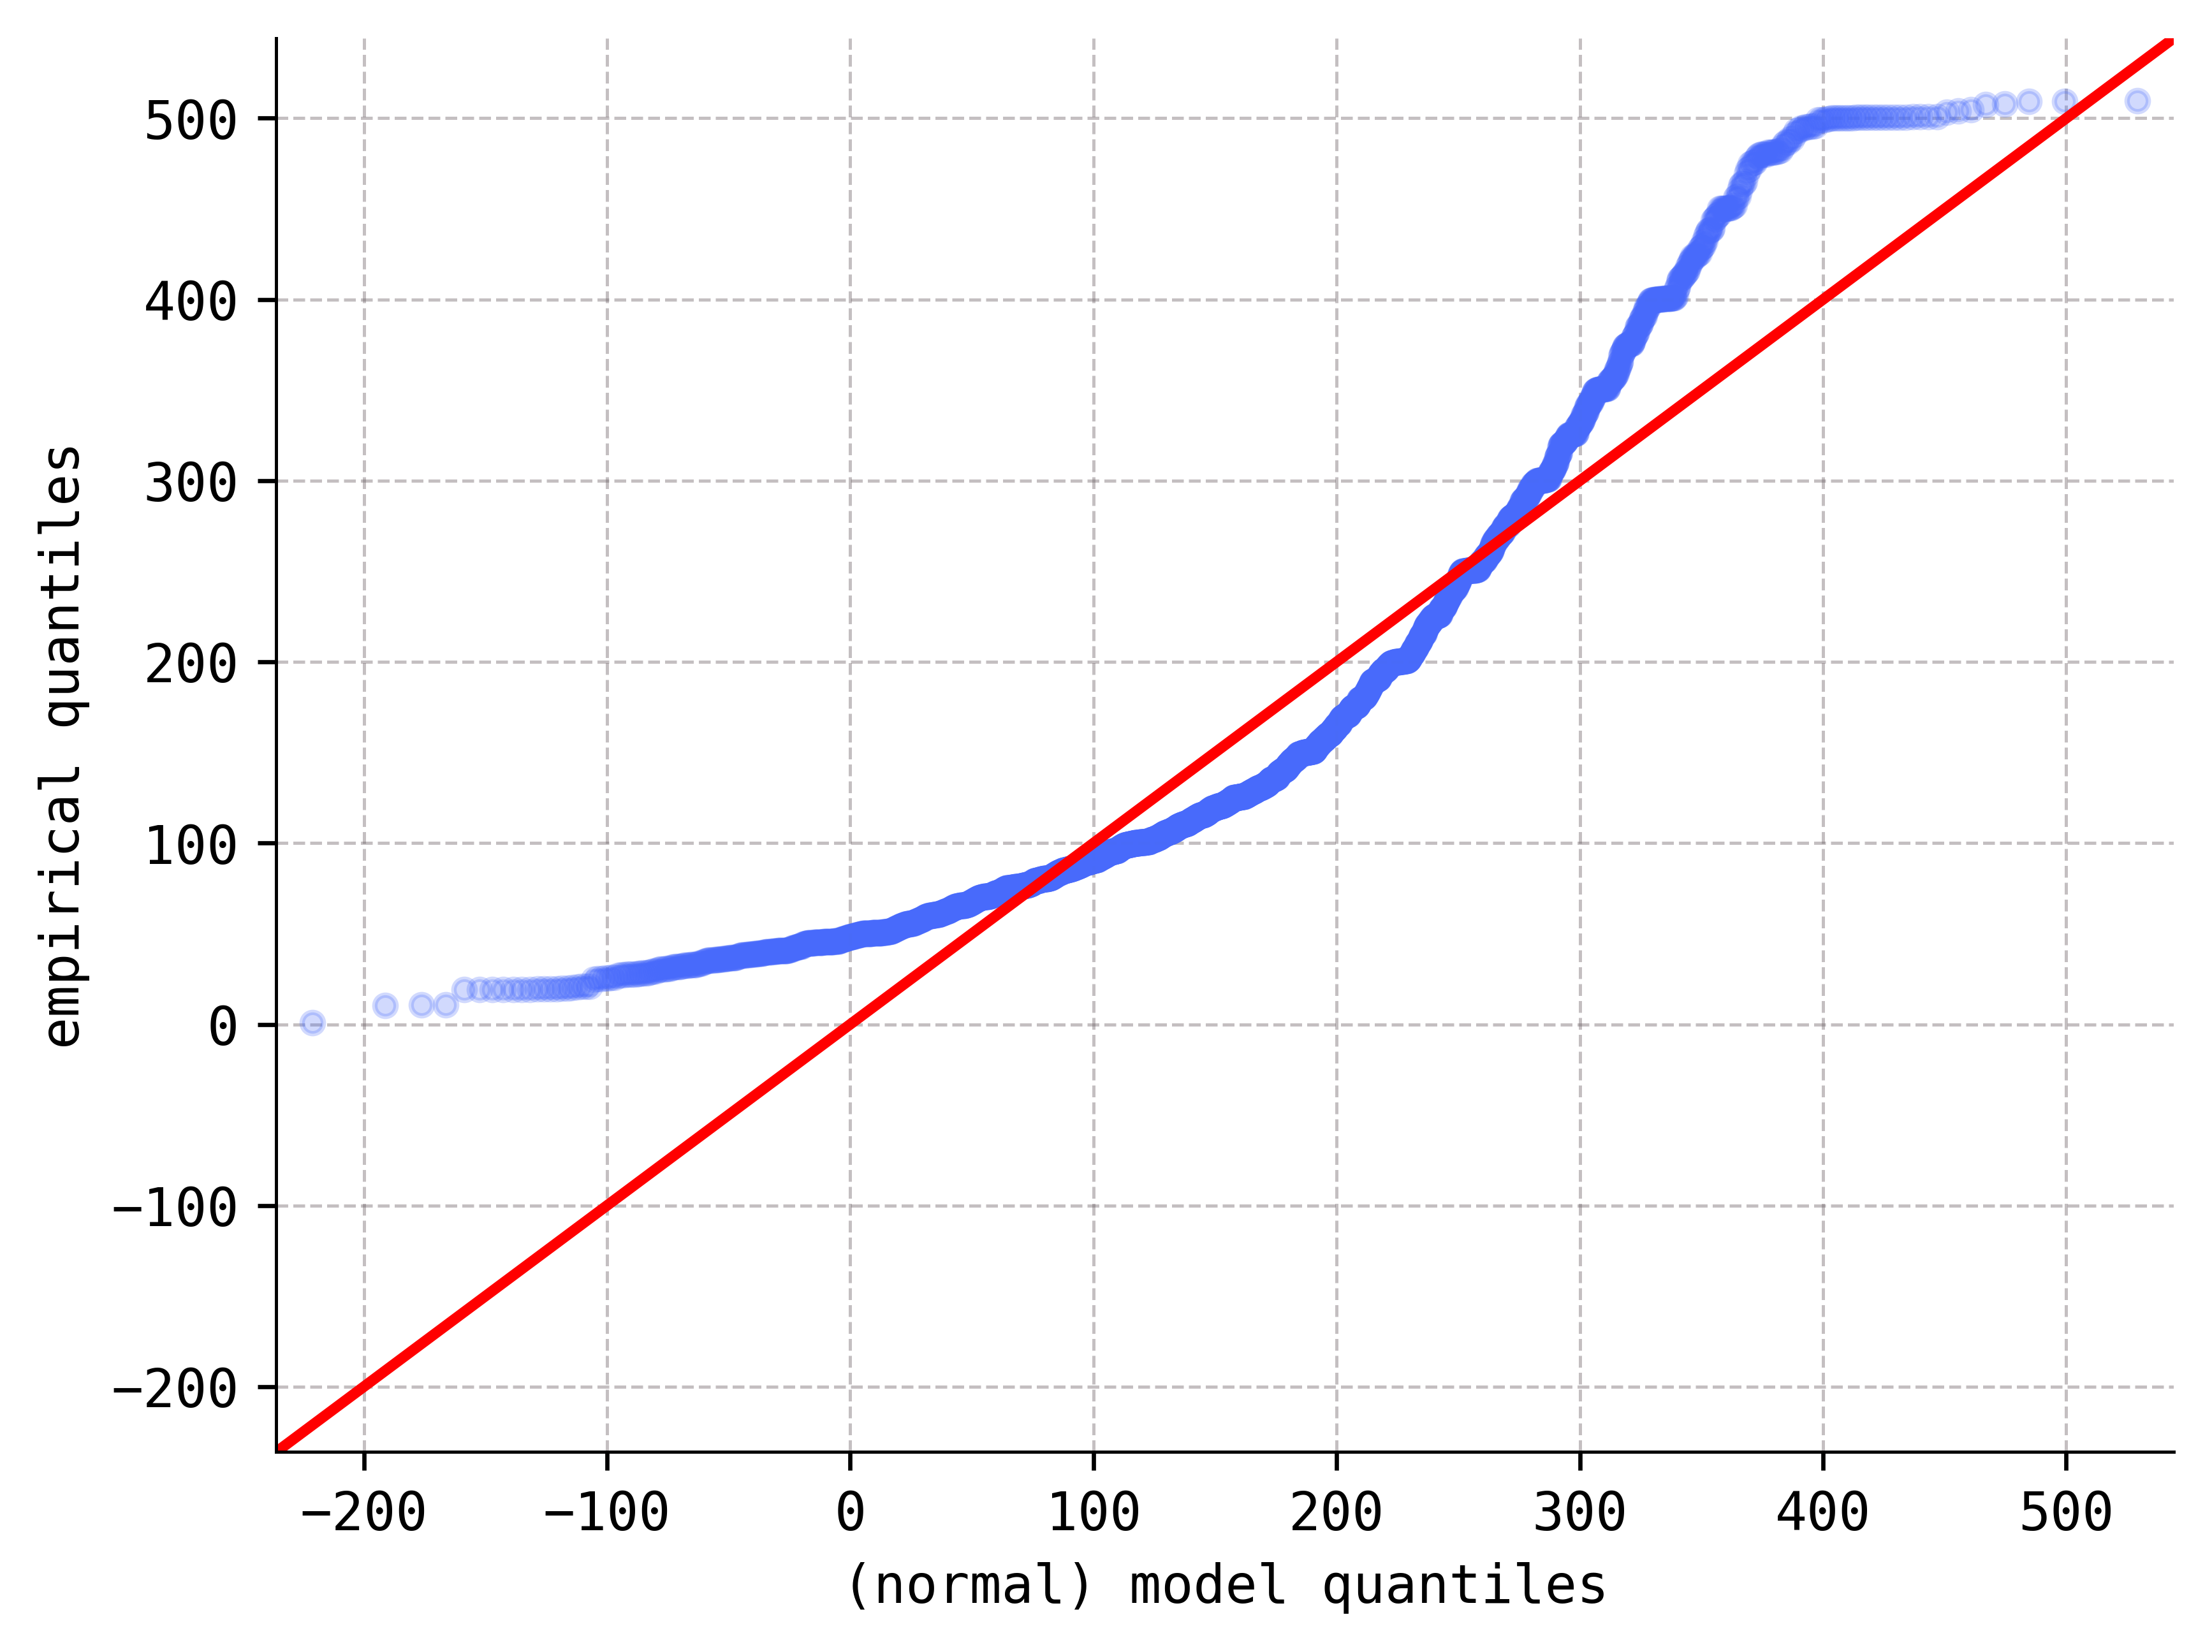

In [12]:
from statsmodels.graphics.gofplots import qqplot

qqplot(data=srs_airbnb, dist=X, a=1/2, alpha=0.25, line='45')
plt.xlabel('(normal) model quantiles')
plt.ylabel('empirical quantiles')
plt.show()

Ok, great. How do we interpret this thing? The idea is that, if the model distribution fit the dataset well, then the empirical quantiles should be reasonably close to the model quantiles. One can judge this "reasonable closeness" in the QQ-plot by checking how well the scattered points fit the diagonal red line (which has a slope of $1$, or 45 degrees).

In our Airbnb example, it is clear that the scattered points are a poor fit for the diagonal line. Thus, the QQ-plot suggests that our dataset is **not** accurately modeled by the proposed normal distribution.

But what if we just chose our parameters $\mu$ and $\sigma^2$ poorly, and the dataset is accurately modeled by _another_ normal distribution with different parameters? In particular, what if we thought that the dataset was accurately modeled by a _standard_ normal distribution? Here's the relevant QQ-plot, to test our hypothesis:

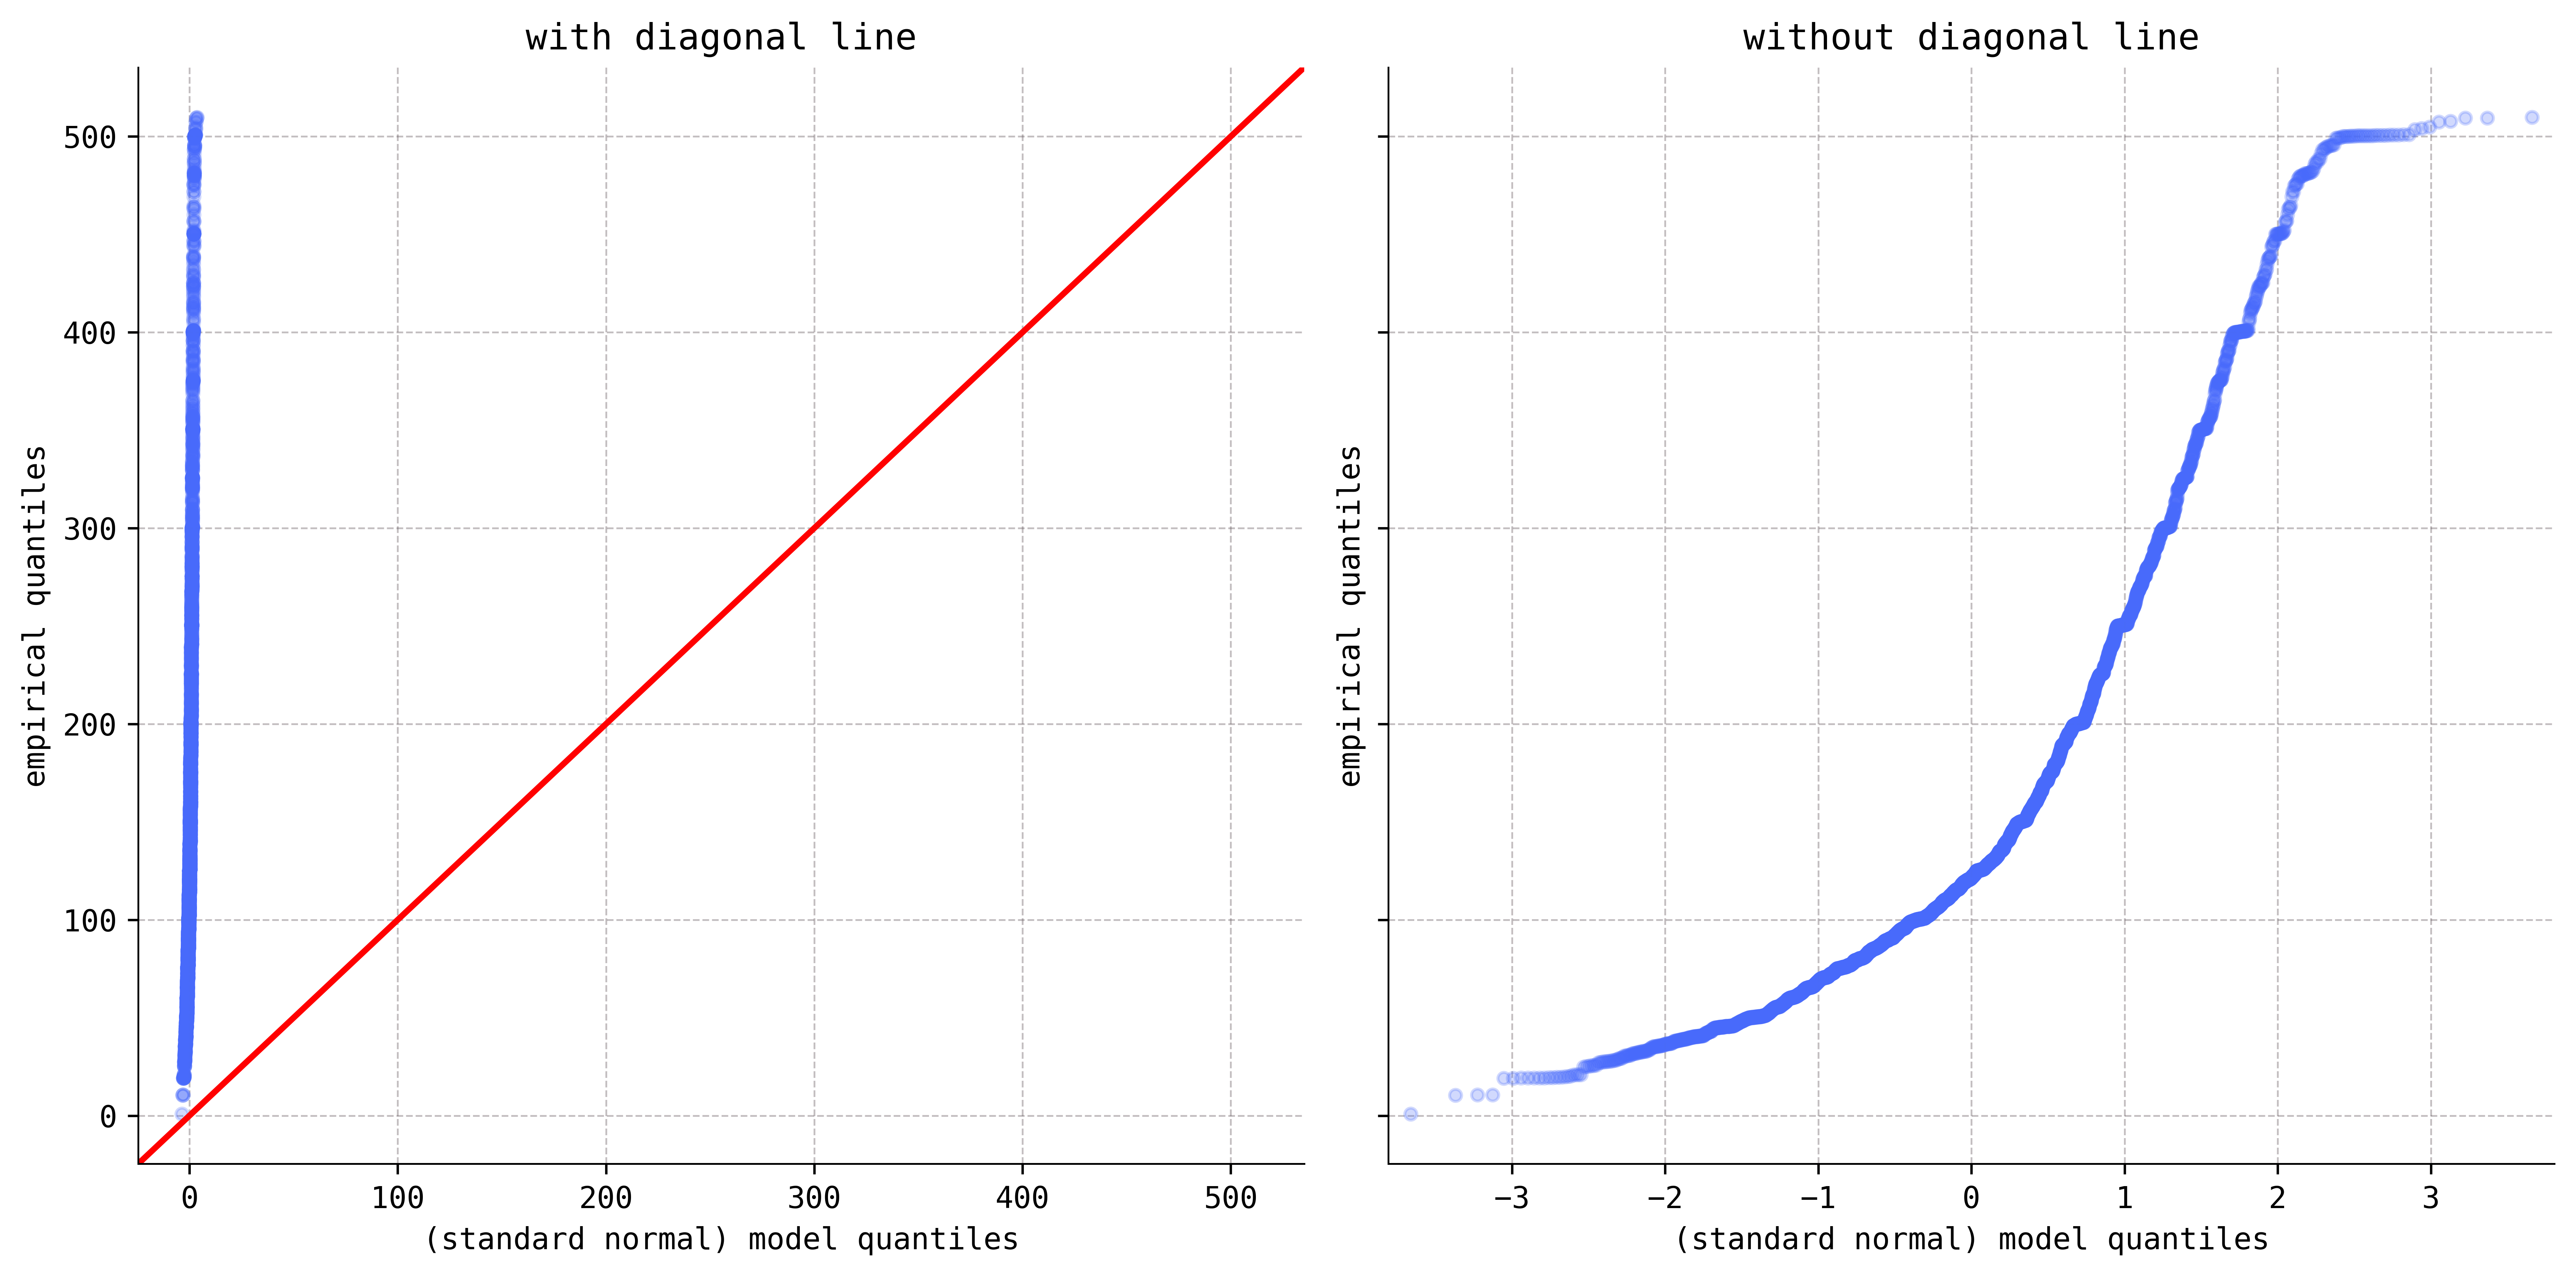

In [13]:
_, axes = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(12, 6))

qqplot(data=srs_airbnb, a=1/2, alpha=0.25, line='45', ax=axes[0])
qqplot(data=srs_airbnb, a=1/2, alpha=0.25, ax=axes[1])
axes[0].set_xlabel('(standard normal) model quantiles')
axes[0].set_title('with diagonal line')
axes[0].set_ylabel('empirical quantiles')
axes[1].set_xlabel('(standard normal) model quantiles')
axes[1].set_ylabel('empirical quantiles')
axes[1].set_title('without diagonal line')
plt.tight_layout()

The QQ-plot on the left (with the diagonal line) shows us that we picked an _even worse_ model. The horizontal axis on the QQ-plot on the right has been re-scaled so that the scattered points do not appear to fall along a (nearly) vertical line, as they do in the left-hand plot.

The point I want to illustrate now is that the QQ-plot on the right---without the diagonal line, and with axes on different scales---may be used to judge whether our data is fit well by _some_ normal distribution. Indeed, my goal is to justify the following:

> **Observation**: What we are looking for in the (standard normal) QQ-plot on the right is whether the scattered points fall along _some_ straight line $y = ax + b$ (with $a>0$). If they do, then the data is fit well by the normal distribution $\mathcal{N}(b,a^2)$.

This observation rests upon the fact that affine transformations of normal variables are still normal (which we saw back in {numref}`Chapter %s <examples>`).

To explain, suppose that the points in the QQ-plot fell _exactly_ on a straight line, so that

```{math}
:label: norm-eqn
y^{(i)} = ax^{(i)} + b, \quad i=1,2,\ldots,m,
```

for some $a$ and $b$ with $a >0$. Then, let

\begin{equation*}
f(x) = \frac{1}{\sqrt{2\pi}} \exp\left( -\frac{x^2}{2}\right)
\end{equation*}

be the density of the standard normal distribution, with associated distribution function $\Phi(x) = \int_{-\infty}^x f(t) \ \text{d} t$. Now, if {eq}`norm-eqn` were true, then

```{math}
:label: trans-eqn
\frac{i-1/2}{m} = \Phi\left( \frac{y^{(i)}-b}{a} \right) = \int_{-\infty}^{(y^{(i)}-b)/a} f(t) \ \text{d} t = \int_{-\infty}^{y^{(i)}} \frac{1}{a} f \left( \frac{s-b}{a}\right) \ \text{d} s,
```

where I made the substitution $t = (s-b)/a$ in going from the first integral to the second. But notice that the transformed function

\begin{equation*}
\frac{1}{a} f \left( \frac{x-b}{a}\right) = \frac{1}{a\sqrt{2\pi}} \exp\left[ -\frac{1}{2} \left(\frac{x-b}{a}\right)^2\right]
\end{equation*}

is the density of $\mathcal{N}(b,a^2)$, and so {eq}`trans-eqn` shows that, provided {eq}`norm-eqn` is true, the data point $y^{(i)}$ is the $(i-1/2)/m$-quantile of $\mathcal{N}(b,a^2)$. Thus, the empirical quantiles match the (theoretical) model quantiles of $\mathcal{N}(b,a^2)$, which justifies the observation in the box above.

Now, whatever a good model for the Airbnb prices happens to be, all of its QQ-plots will look like nice smooth curves. However, if your dataset is large, consisting of observed values of a discrete variable with a small-ish range, then the QQ-plot might have an unexpected shape with lots of horizontal stretches due to repetitions in the dataset.

```{margin}
This dataset was obtained from the UCI Machine Learning Repository [here](http://archive.ics.uci.edu/dataset/352/online+retail). It was passed through some light pre-processing, including removal of (extreme) outliers.
```

For example, let's consider a dataset consisting of sales data from an online retail store in the UK. Here's a description:

In [14]:
srs_sales = pd.read_csv('../aux-files/online_sales.csv', usecols=['Quantity']).squeeze()
srs_sales.describe()

count    447322.000000
mean          4.342078
std           4.426455
min         -12.000000
25%           1.000000
50%           2.000000
75%           6.000000
max          23.000000
Name: Quantity, dtype: float64

The data consists of observations of the random variable

\begin{equation*}
Y = \text{number of items purchased in a given order}.
\end{equation*}

So, an observed value of $y=3$ in the dataset means that three items were purchased in the corresponding order. From the 'count,' 'max,' and 'min' numbers in the description of the dataset, we see that the dataset contains nearly half a million data points distributed over discrete (integer) values ranging from $y=-12$ to $y=23$. (A negative value means that items were returned to the store.) Therefore, there are going to be _lots_ of repetitions in this dataset.

Here's the QQ-plot of this dataset against the standard normal distribution, with re-scaled axes:

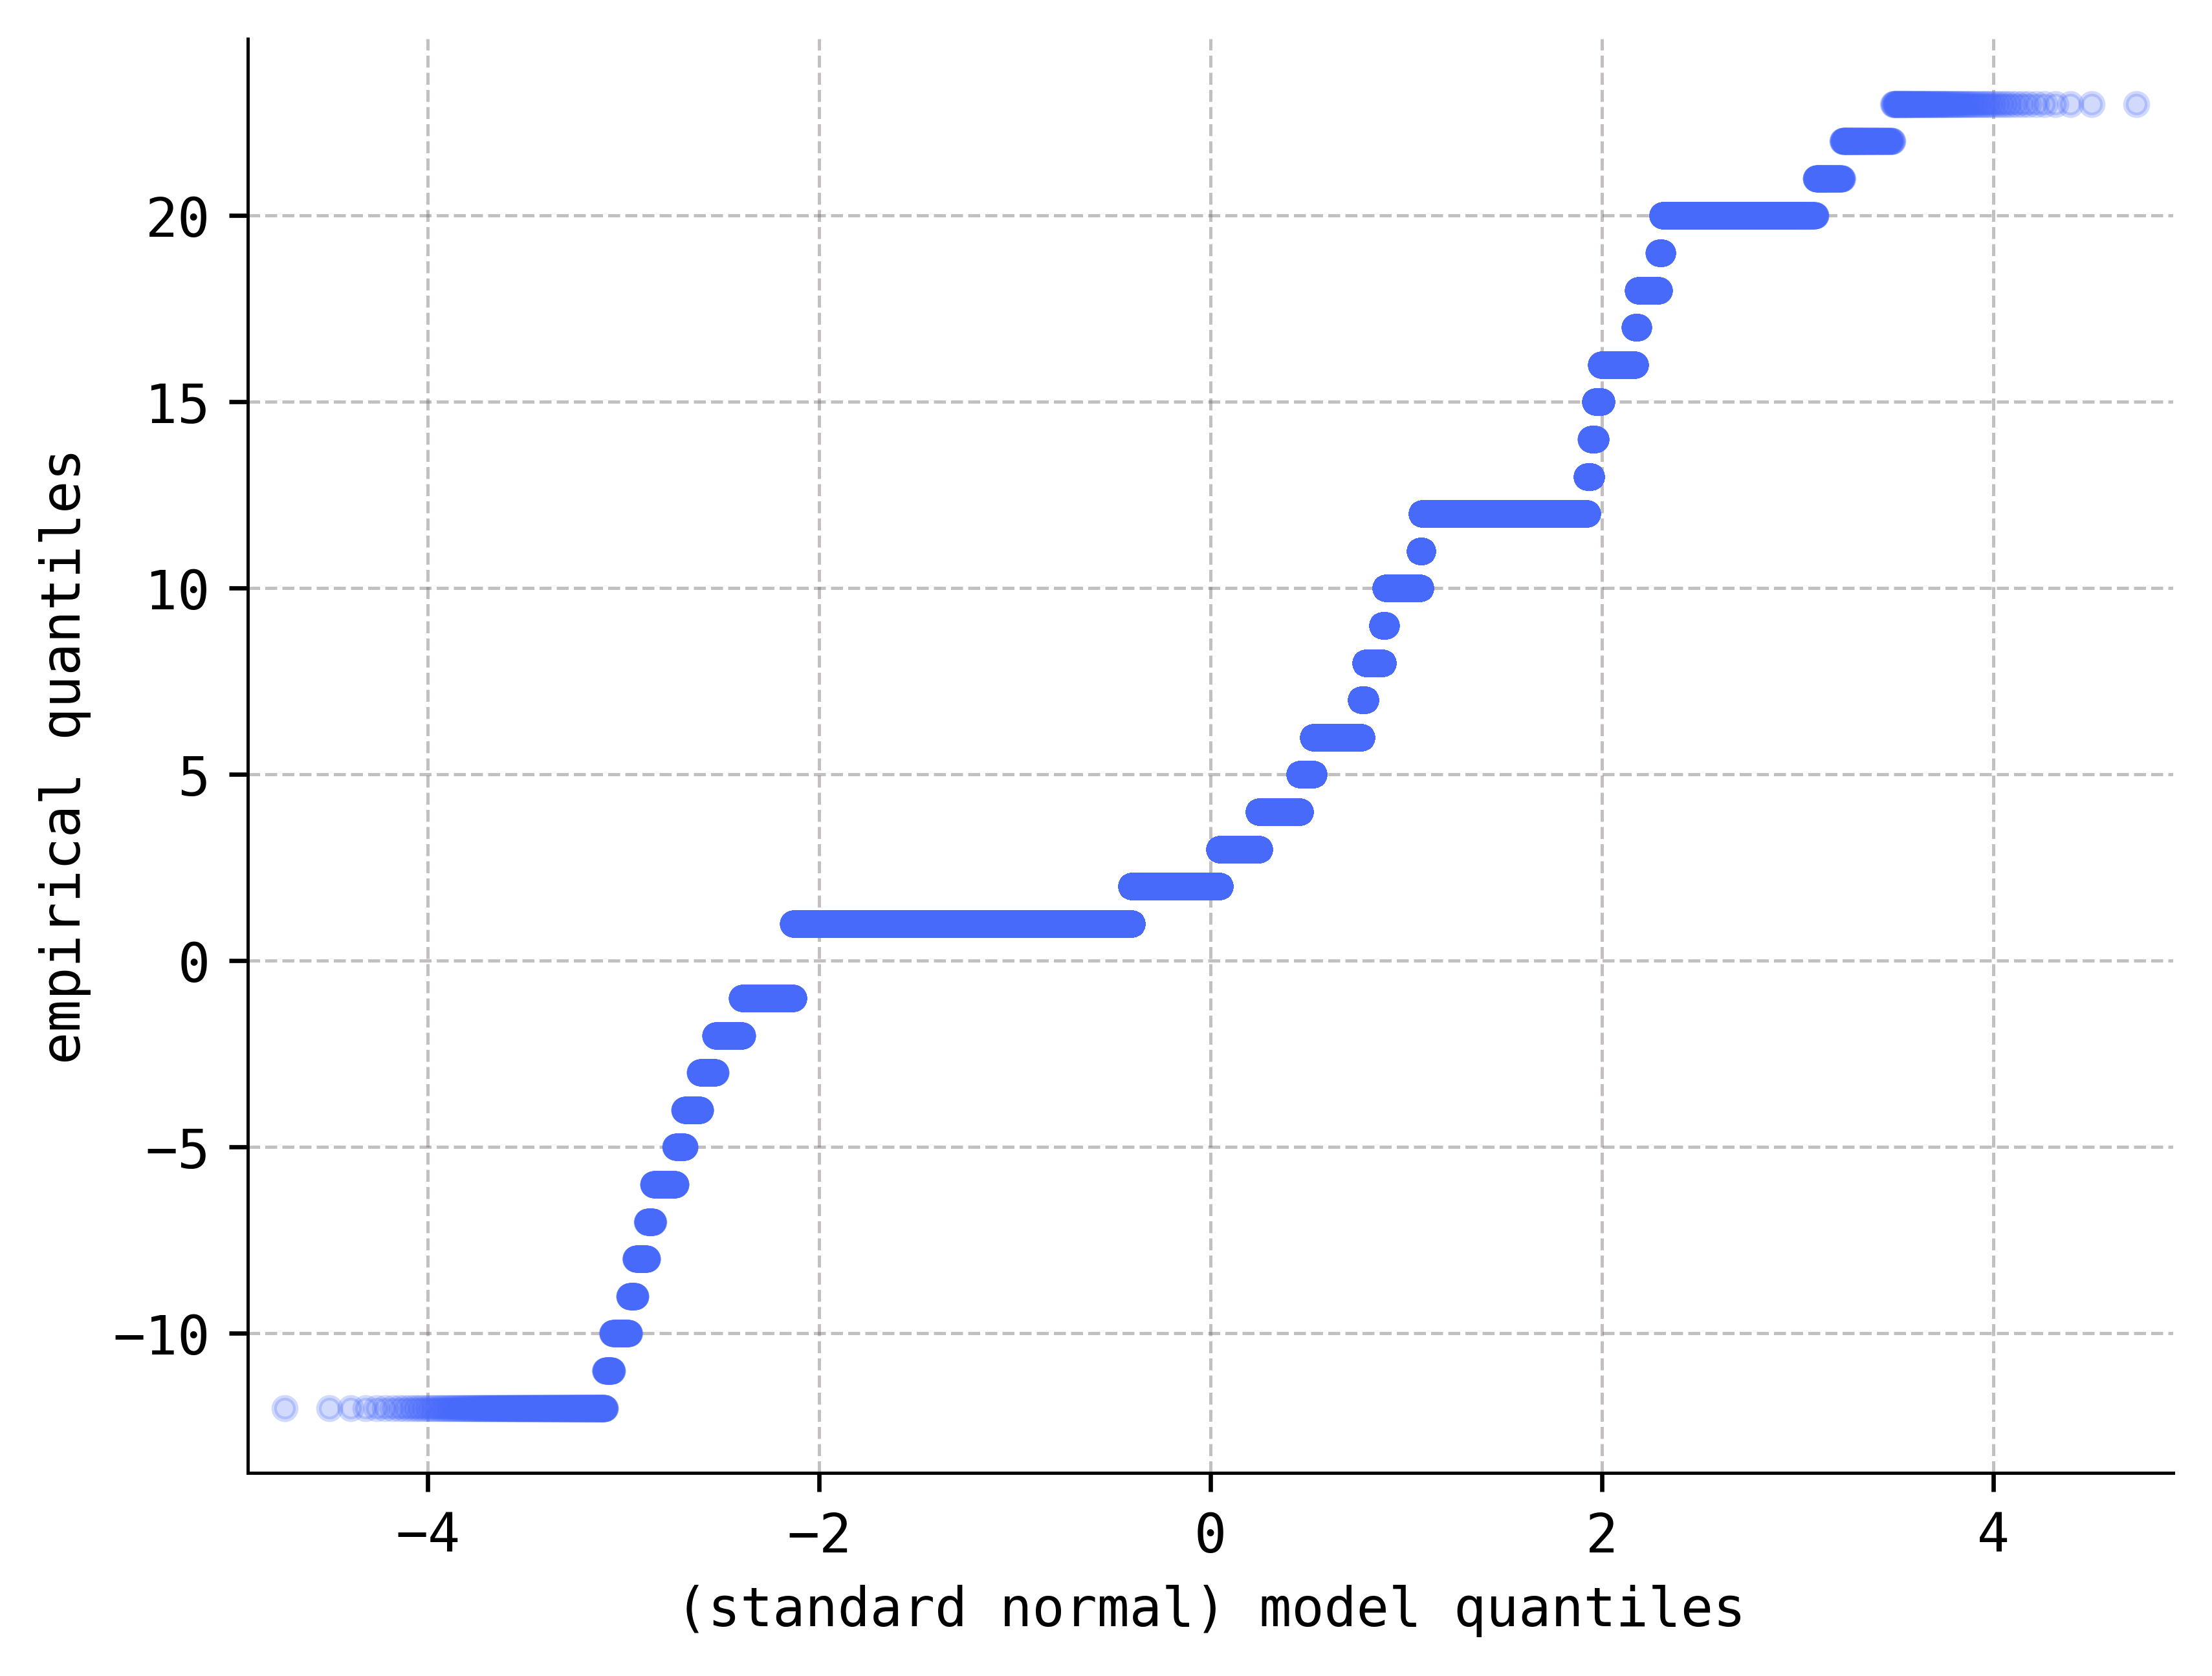

In [15]:
qqplot(data=srs_sales, a=1/2, alpha=0.25)
plt.xlabel('(standard normal) model quantiles')
plt.ylabel('empirical quantiles')
plt.show()

In contrast to the QQ-plot of the Airbnb prices, this QQ-plot appears to be a series of disconnected horizontal lines. The $y$-value of a horizontal line corresponds to a value in the dataset that is repeated. But be _very_ careful in interpreting the _lengths_ of the horizontal lines as measures for how _often_ the data points are repeated, as you would with the heights of the bars in a histogram. Indeed, because of the shape of normal density curves (which are nearly flat away from their means), the lengths of horizontal lines toward the bottom and the top of the QQ-plot are disproportionately scaled up compared to the lengths of the horizontal lines in the middle of the plot. (I will explain this more precisely in class, with pictures.)

For example, focus on the horizontal lines in the QQ-plot at $y=12$ and $y=20$. These lines appear to have nearly the same length. But then look at the histogram of the data, which for comparison I've plotted behind a normal density curve with $\mu=$ empirical mean and $\sigma=$ empirical standard deviation.

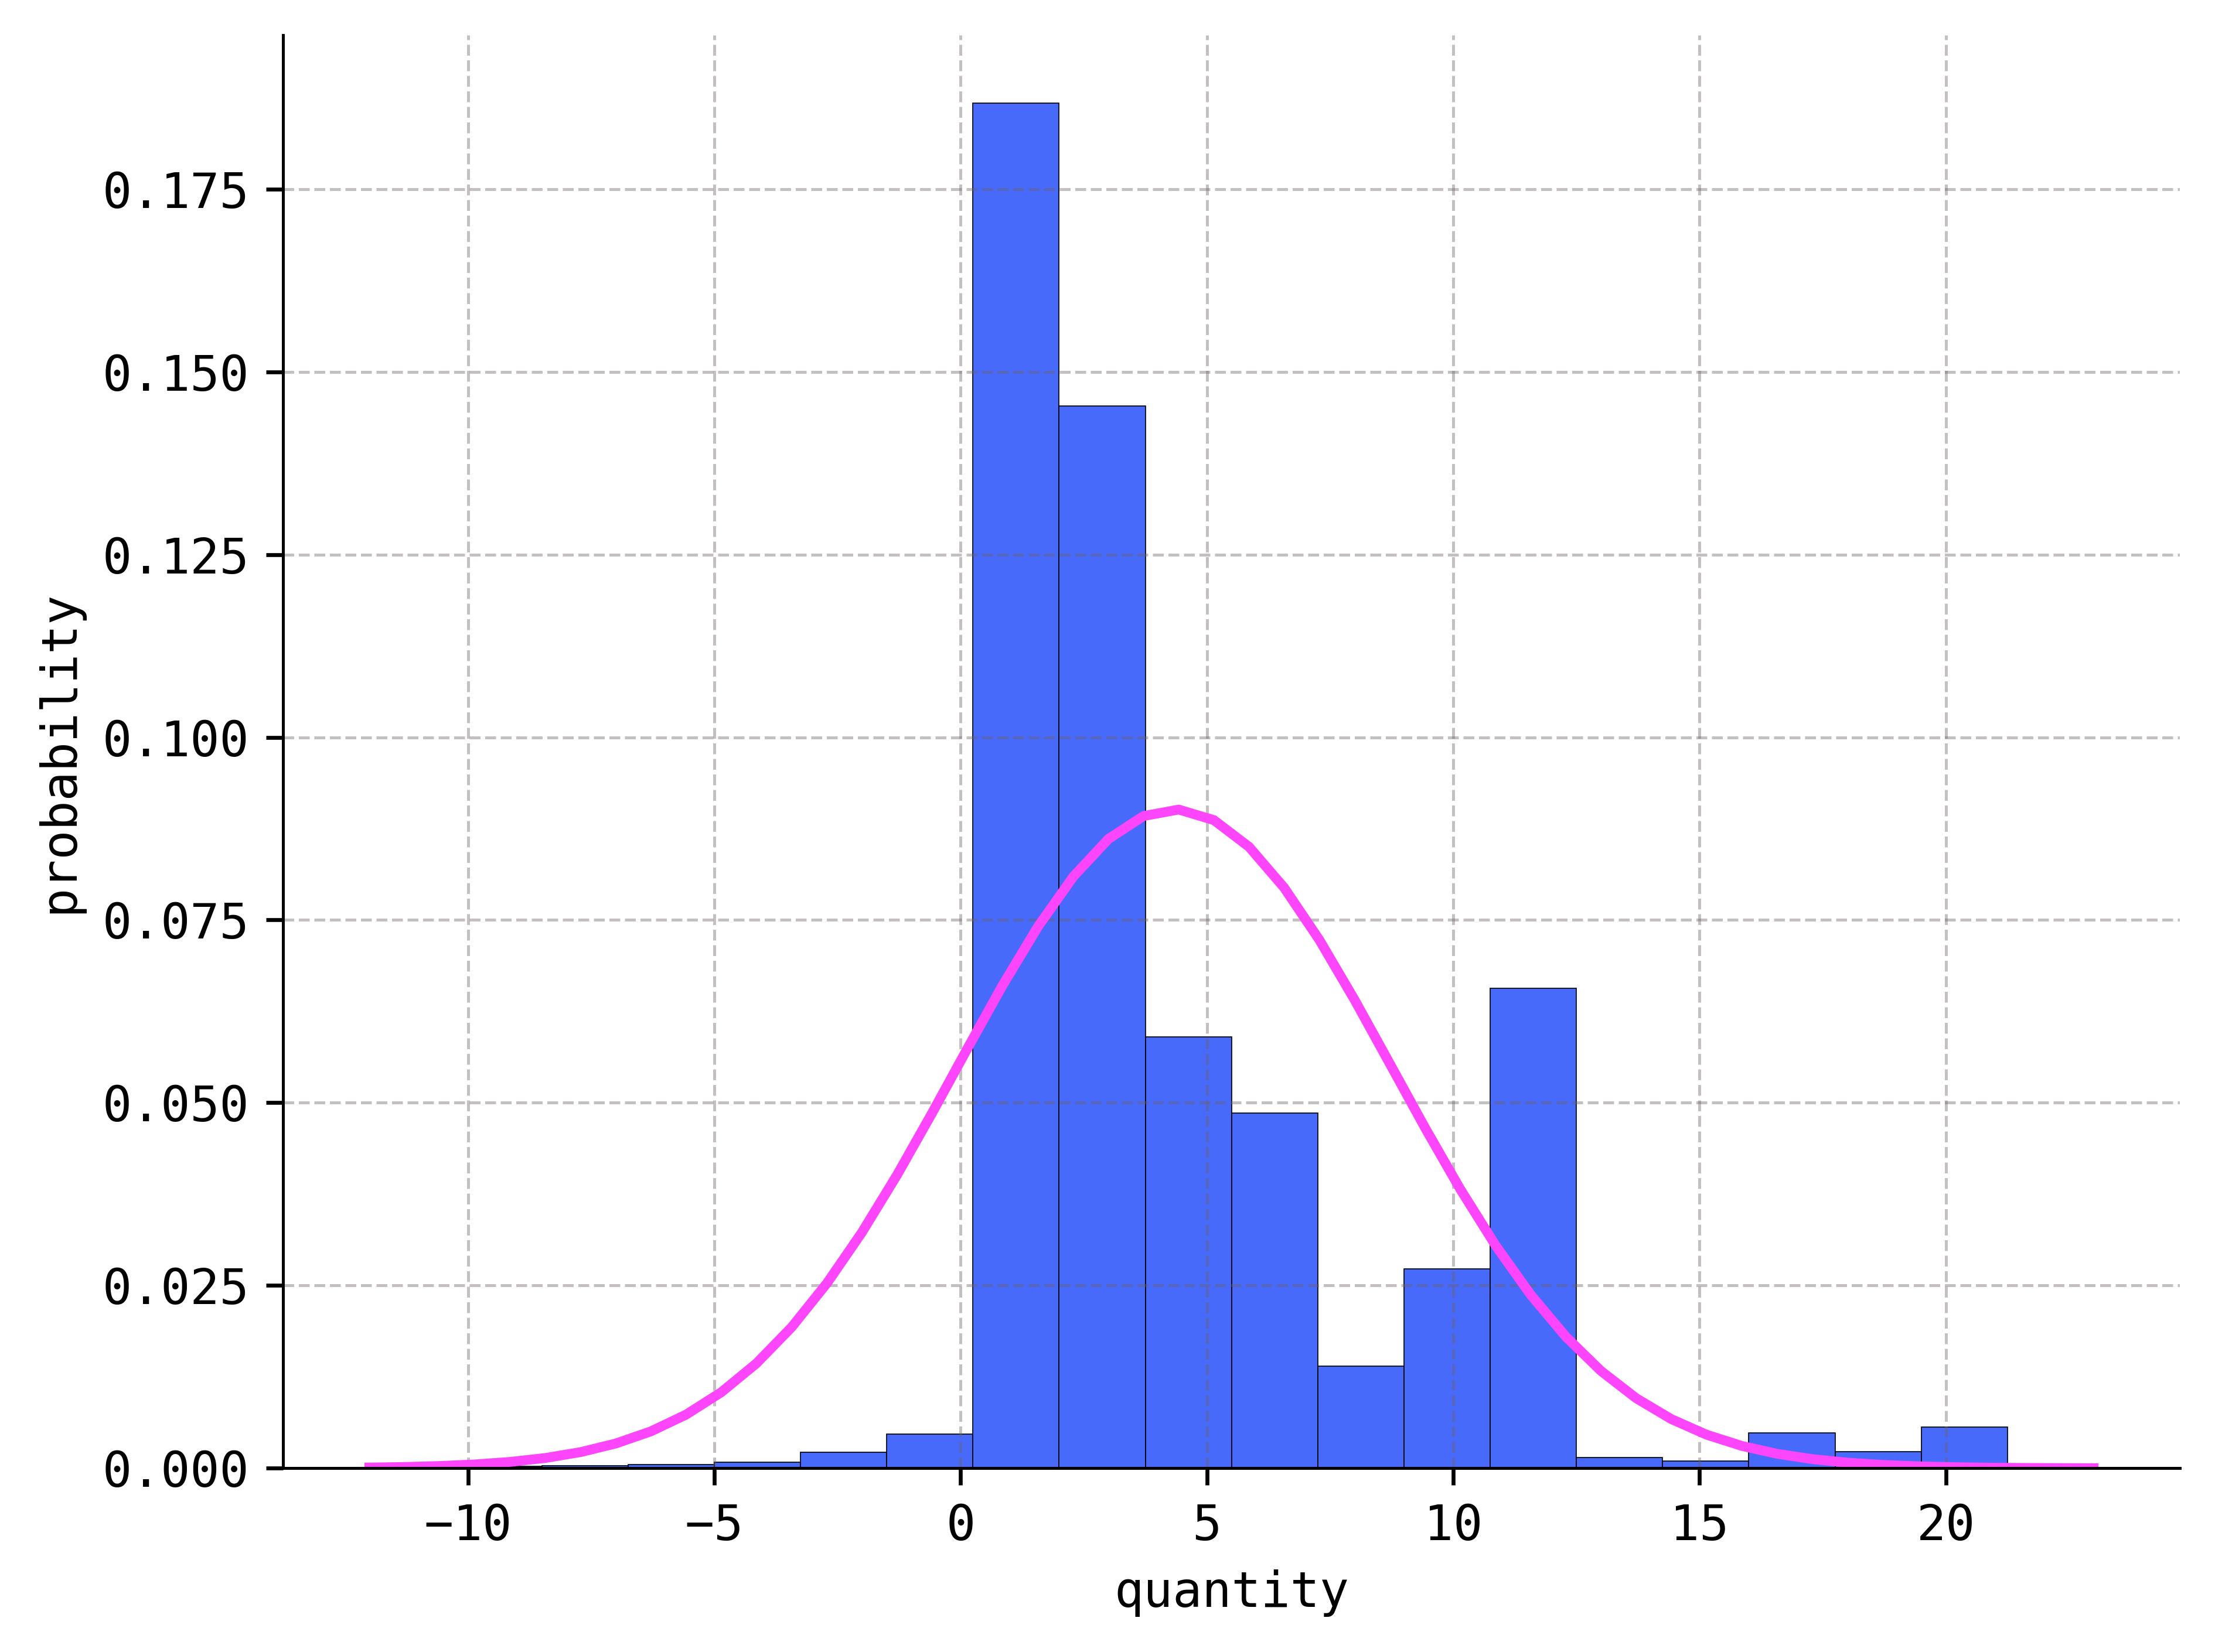

In [16]:
grid = np.linspace(-12, 23)
U = sp.stats.norm(loc=srs_sales.mean(), scale=srs_sales.std())

srs_sales.plot(kind='hist', ec='black', density=True, bins=20)
plt.plot(grid, U.pdf(grid))
plt.xlabel('quantity')
plt.ylabel('probability')
plt.tight_layout()

The histogram reveals that there are many, _many_ fewer observations at $y=20$ compared to $y=12$, and yet the corresponding horizontal lines in the QQ-plot appear to have the same length! Again, this discrepancy is due to the shape of normal density curves.

So, we should not think of the lengths of the horizontal lines in a QQ-plot as a measure of _absolute_ discrepancy compared to a normal distribution. Rather, they are a measure of the _relative_ discrepancy. In other words, their lengths should be proportional to the ratio

\begin{equation*}
\frac{\text{actual frequency of observed data point}}{\text{frequency of data point as predicted by a normal distribution}}.
\end{equation*}

This helps resolve the conflict between the equality of the lengths of the horizontal lines at $y=12$ and $y=20$, for the normal distribution predicts that we should see $y=12$ much more often than $y=20$, so that the two relative discrepancies should be nearly equal.


















































## Box plots and violin plots

We finish the chapter with a discussion of two more methods to visualize datasets and empirical distributions. To begin, let's first consider the online sales data along with all the empirical statistics that we described and computed in the previous sections. We may combine all this information in something called a _box plot_ (or _box and whisker plot_):

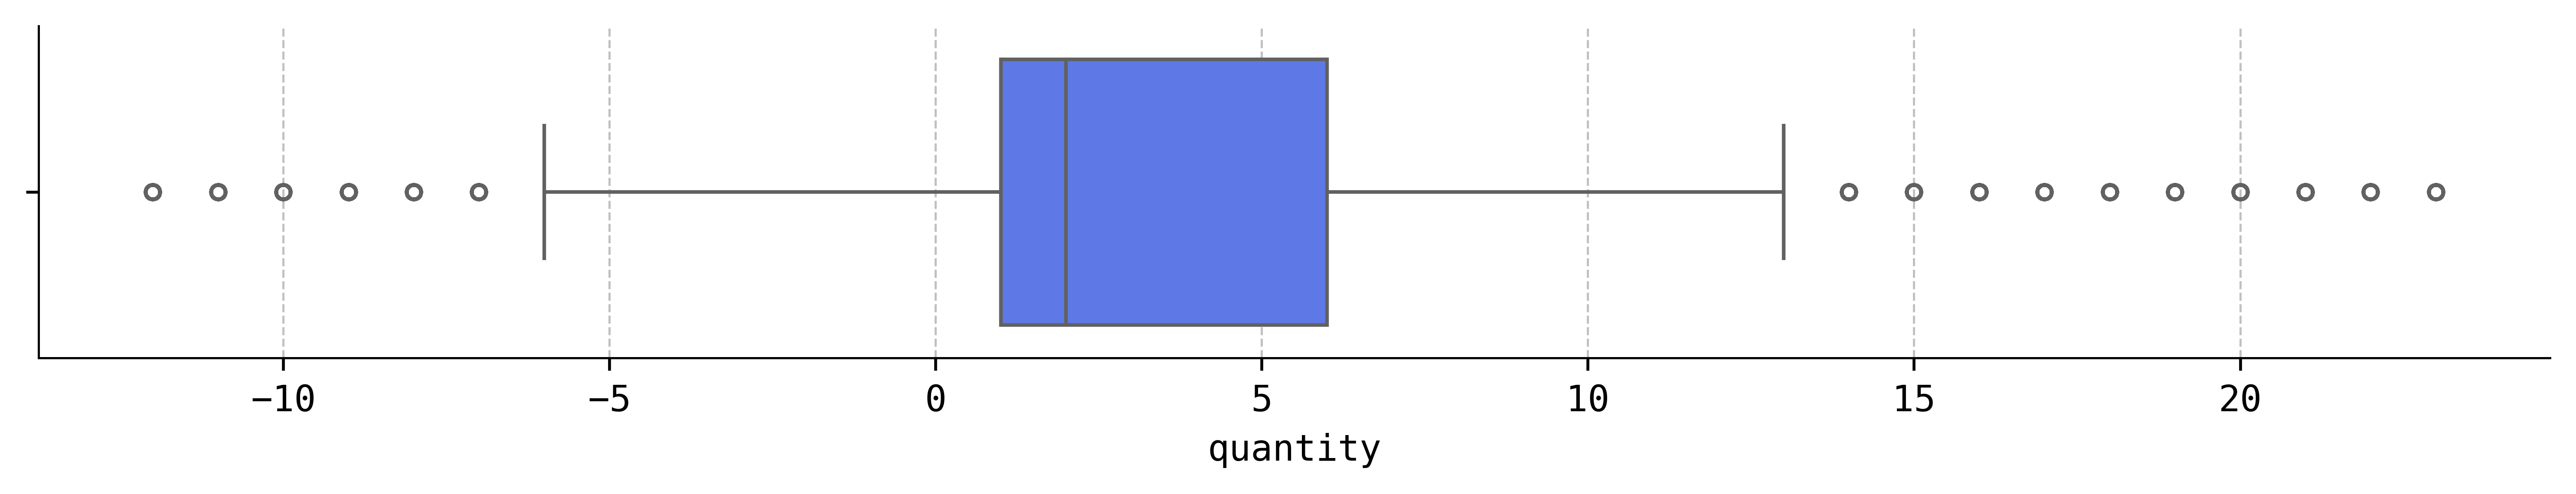

In [17]:
sns.boxplot(x=srs_sales)
plt.xlabel('quantity')
plt.gcf().set_size_inches(w=10, h=2)
plt.tight_layout()

The left edge of the blue box is at $x=1$, which is the empirical $0.25$-quantile or first quartile; likewise, its right edge is at $x=6$, which is the empirical 0.75-quantile or third quartile. Therefore, the _width_ of the box is exactly the empirical IQR. The box thus represents where the middle 50% of the dataset lives. The vertical line through the box is at $x=2$, which is the empirical 0.5-quantile or the empirical median.

You notice that the box has "whiskers." The left whisker either extends out to the minimum value in the dataset _or_ to the threshold value

\begin{equation*}
(\text{empirical 0.25-quantile}) - 1.5\times (\text{empirical IQR})
\end{equation*}

for determining outliers, whichever is greater. In this case, the whisker extends to the threshold value, and then all the dots to the _left_ of the whisker represent outliers in the lower tail of the distribution.

Likewise, the right whisker either extends out to the maximum value in the dataset _or_ to the upper threshold value

\begin{equation*}
(\text{empirical 0.75-quantile}) + 1.5\times (\text{empirical IQR})
\end{equation*}

for determining outliers, whichever is smaller. In this case, the dataset _does_ contain outliers in its upper tail, so the whisker extends to the threshold value, and all the dots to the right are outliers.

Here's the box plot for the Airbnb prices:

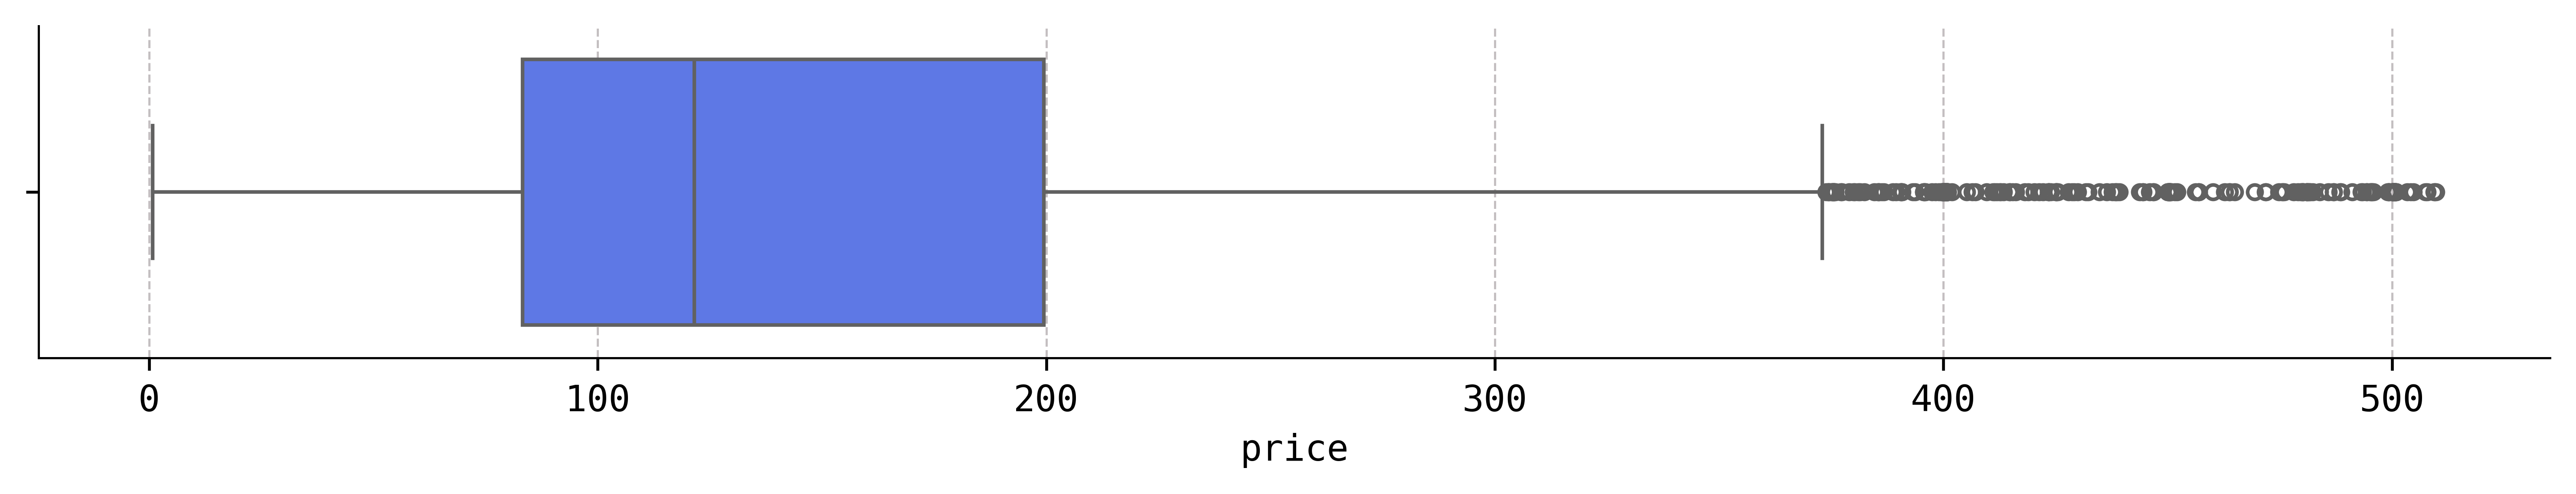

In [18]:
sns.boxplot(x=srs_airbnb)
plt.xlabel('price')
plt.gcf().set_size_inches(w=10, h=2)
plt.tight_layout()

This time, there are _no_ outliers in the lower tail of the distribution, since the minimum value in the dataset is 82 cents (really?!), which is greater than the lower threshold for determining outliers. However, there are _lots_ of outliers in the upper tail of the distribution, and they are very densely packed together.

Now, what were to happen if we combined a box plot with one of the tools for graphical EDA that we studied earlier? We'd get something like this:

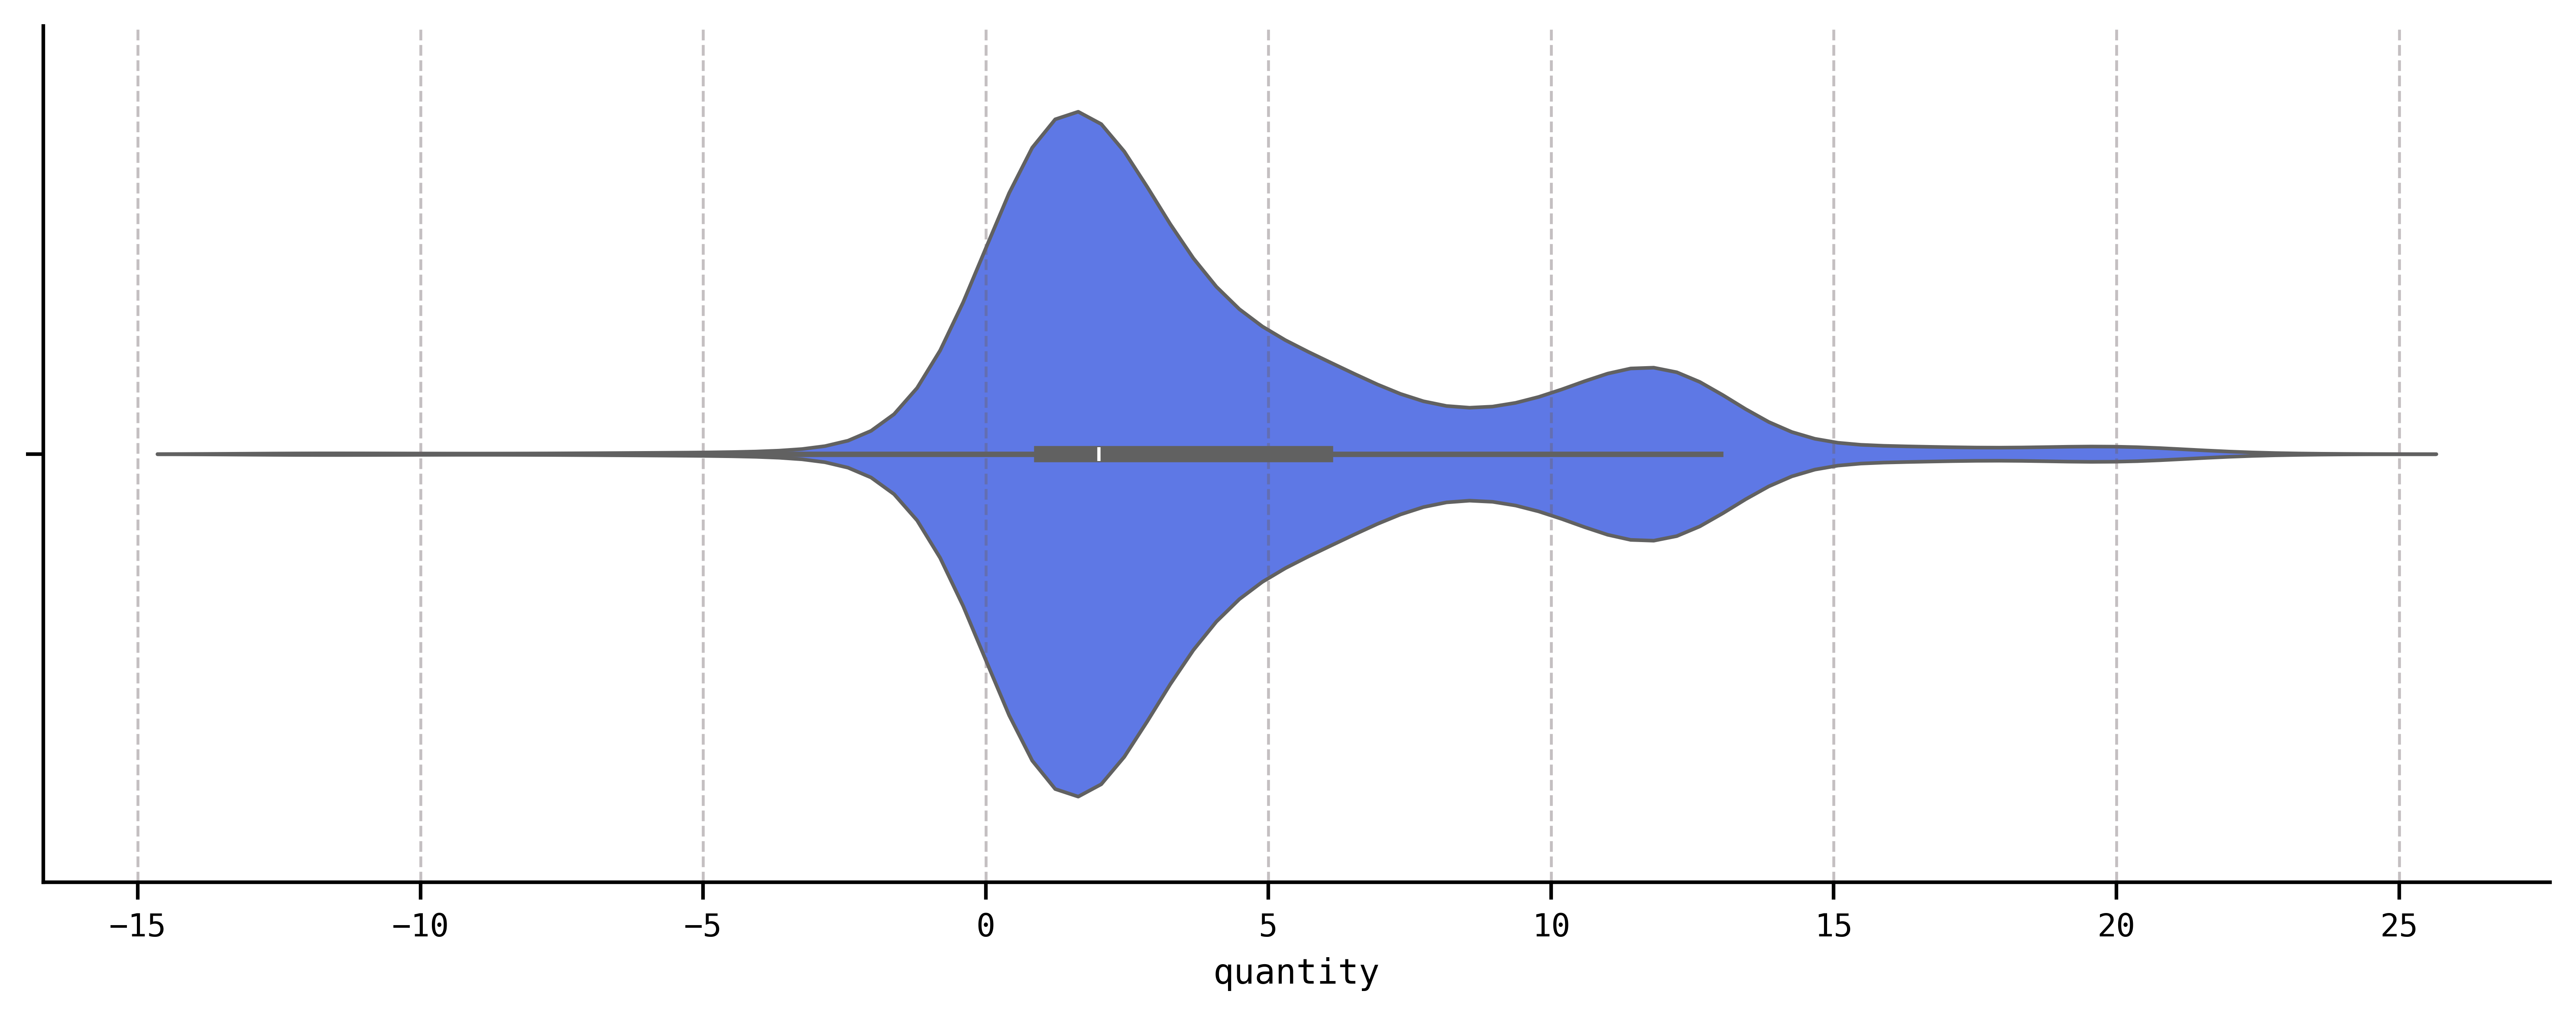

In [19]:
sns.set_context('paper')
sns.violinplot(x=srs_sales, bw=0.3)
plt.xlabel('quantity')
plt.gcf().set_size_inches(w=10, h=4)
plt.tight_layout()

This is a _violin plot_ of our online sales data (the reason for the name is evident). Along the central horizontal line is a box plot---can you see it? The white dot in the box represents the empirical median. You can see the upper whisker in its entirety, but the tip of the lower whisker is not visible. Then, above the central horizontal line is displayed a KDE of the dataset, and its mirror image is displayed below. For comparison, here's a picture of a KDE of the dataset all on its own:

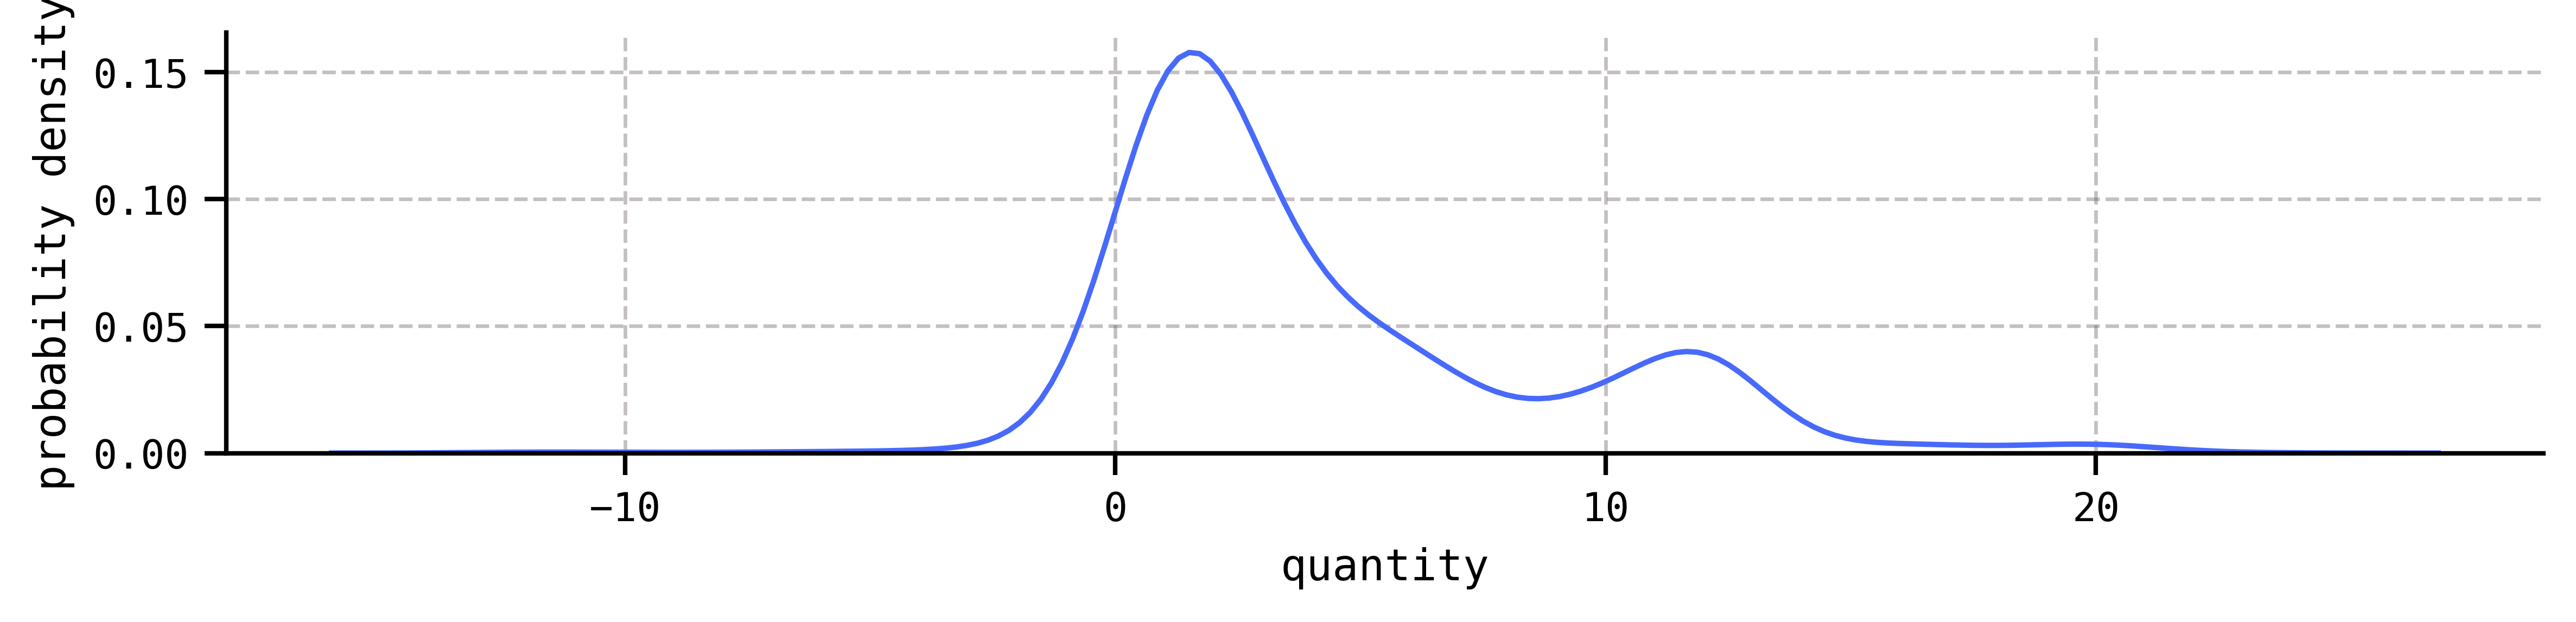

In [20]:
sns.kdeplot(x=srs_sales, bw_method=0.3)
plt.gcf().set_size_inches(w=8, h=2)
plt.xlabel('quantity')
plt.ylabel('probability density')
plt.tight_layout()

So, violin plots are tools belonging to both graphical and numerical EDA since they combine KDEs with box plots. They have advantages over just plain box plots because they are better able to convey a sense of the _shape_ of a dataset. For example, box plots cannot display multiple data modes (multiple peaks in the distribution), whereas KDEs _can_. We see this in the online sales dataset above, which is bimodal (has two peaks).

Here's a violin plot of the Airbnb dataset:

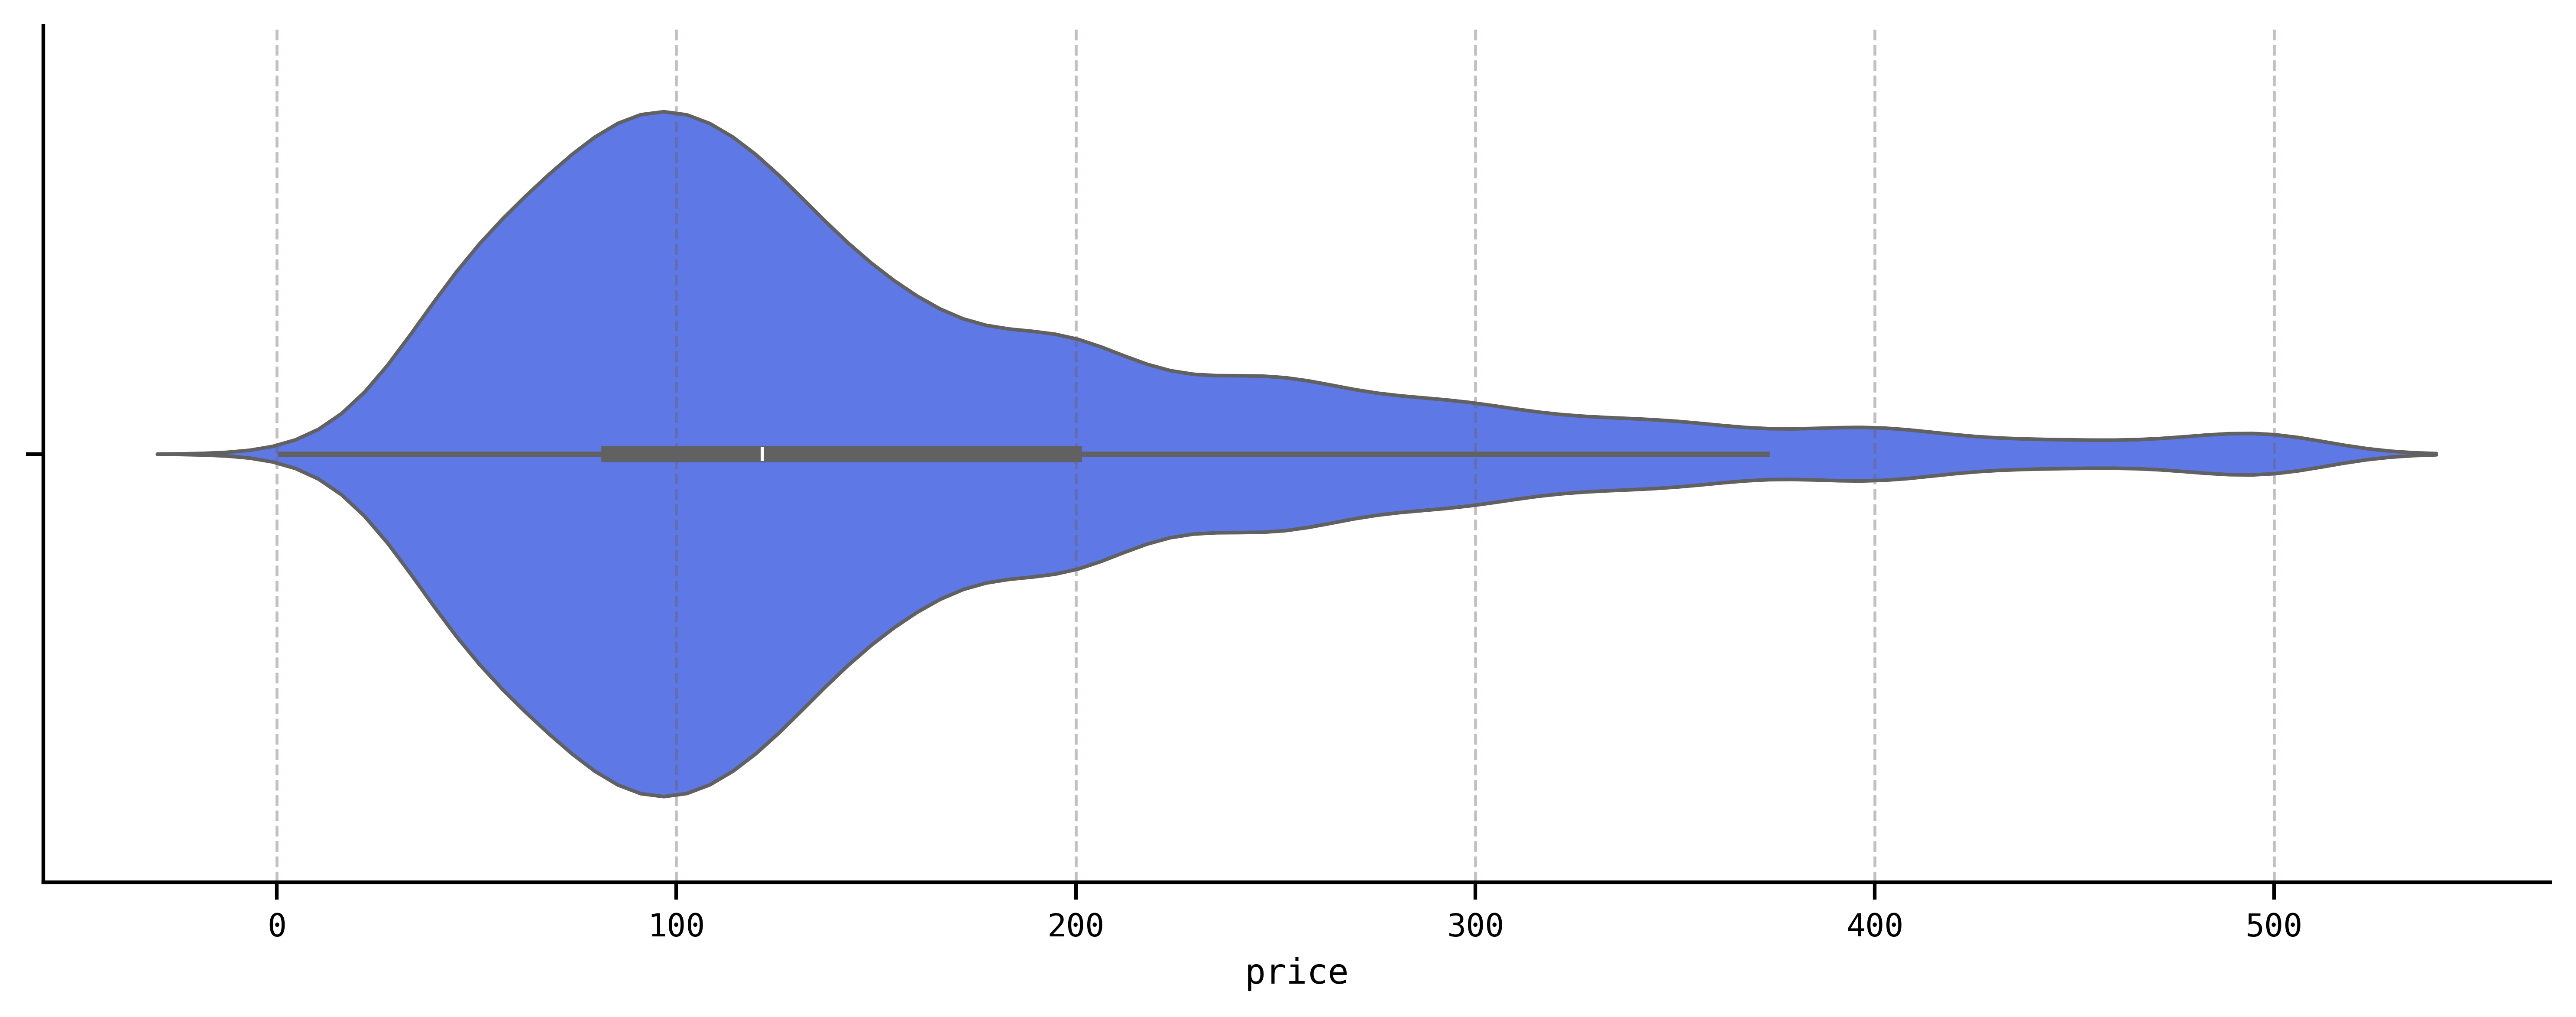

In [21]:
sns.set_context('paper')
sns.violinplot(x=srs_airbnb, bw=0.15)
plt.xlabel('price')
plt.gcf().set_size_inches(w=10, h=4)
plt.tight_layout()

We see that a significant portion of the upper tail of the distribution extends beyond the tip of the upper whisker, indicating many large outliers.